# Instalaci√≥n del paquetes

In [1]:
pip install --upgrade pip

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.8/1.8 MB 20.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [2]:
pip install ucimlrepo pandas numpy seaborn matplotlib scipy scikit-learn imbalanced-learn lightgbm optuna xgboost Jinja2 catboost

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 98.7/98.7 MB 51.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18.3/18.3 MB 50.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


# Importaci√≥n de librer√≠as

In [1]:
from ucimlrepo import fetch_ucirepo

import pandas as pd
#from ydata_profiling import ProfileReport
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, normaltest, anderson, chi2_contingency, spearmanr, kruskal, mannwhitneyu
from sklearn.feature_selection import mutual_info_classif
from matplotlib.colors import to_rgba
import matplotlib.patches as mpatches
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler
from lightgbm import LGBMClassifier
import optuna
from xgboost import XGBClassifier
import math
import time
from catboost import CatBoostClassifier

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Dataset

In [2]:
# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
Y = cdc_diabetes_health_indicators.data.targets
data = pd.concat([X, Y], axis=1)

data.head()

ConnectionError: Error connecting to server

In [ ]:
# metadata
#print(cdc_diabetes_health_indicators.metadata)

# informacion de variables
variables_df = pd.DataFrame(cdc_diabetes_health_indicators.variables)
pd.set_option("display.max_colwidth", None)
display(variables_df[['name', 'description']].style.set_properties(**{'text-align': 'left'}))

# variables
numerical_columns = ['BMI', 'MentHlth', 'PhysHlth']
categorical_columns = X.drop(columns=numerical_columns).columns.tolist()
categorical_nonbinary_columns = ['GenHlth','Age', 'Education', 'Income']
categorical_binary_columns = [col for col in categorical_columns if col not in categorical_nonbinary_columns]

print("numerical_columns:", numerical_columns)
print("categorical_columns:", categorical_columns)
print("categorical_nonbinary_columns:", categorical_binary_columns)
print("categorical_binary_columns:", categorical_nonbinary_columns)

numerical_columns: ['BMI', 'MentHlth', 'PhysHlth']
categorical_columns: ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
categorical_nonbinary_columns: ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
categorical_binary_columns: ['GenHlth', 'Age', 'Education', 'Income']


# 1. Exploraci√≥n de los datos

## 1.1. ProfileReport

In [ ]:
report = ProfileReport(data)
report

NameError: name 'ProfileReport' is not defined

Observaciones:
* ninguna de las variables tienen valores faltantes
* en principio son todo numeros (se comprobar√° m√°s adelante)
* se comprueba que los valores introducido efectivamente son los que se esperaban (no hay valores incorrectos)
* a simple vista no se observan outlayers muy significativos (se comprobar√° m√°s adelante)
* existen imbalances en los datos en: CholCheck (77.0%), Stroke (75.5%), HeartDiseaseorAttack (55.0%), HvyAlcoholConsump (68.8%), AnyHealthcare (71.8%) y NoDocbcCost (58.3%).
* el Dataset tiene 11369 (4.5%) filas iguales (duplicadas?) => NO van a eliminarse, ya que Machine Learning Repository afirma lo siguiente: "Each row represents a person participating in this study."

## 1.2. Distribuci√≥n de las caracter√≠sticas

### Tipo de distribuci√≥n
Se analiza si las variables num√©ricas siguen o no una distribuci√≥n normal.

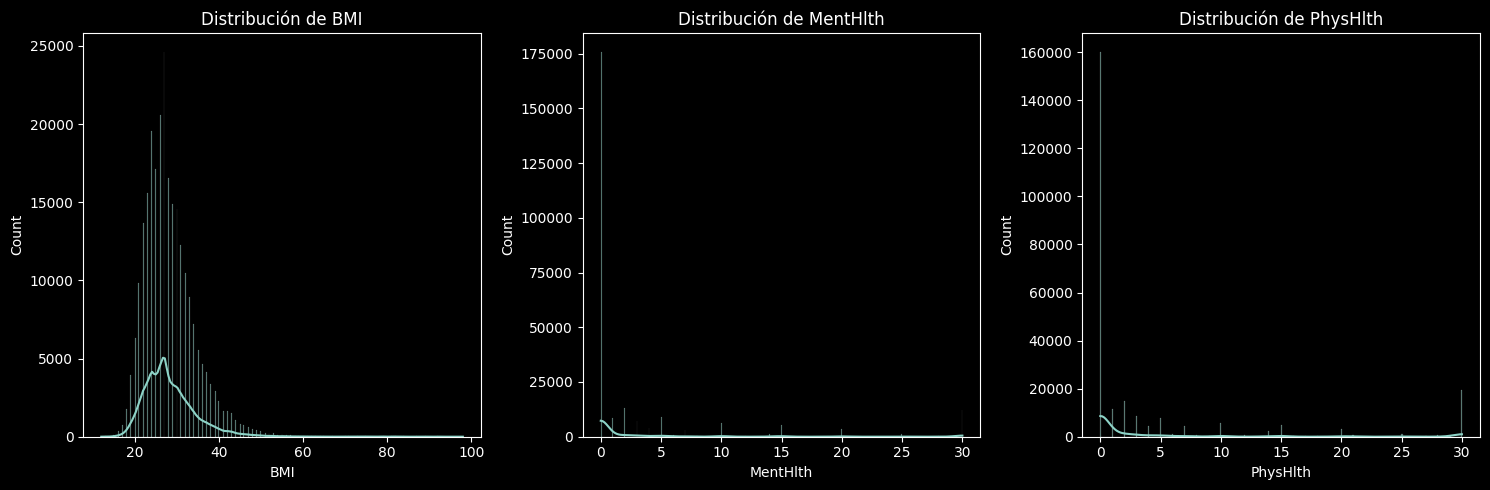


--- An√°lisis de normalidad para BMI ---
Shapiro-Wilk Test: Estad√≠stico=0.8717, p=0.0000 (Rechaza H0)
D‚ÄôAgostino‚Äôs K^2 Test: Estad√≠stico=126255.7185, p=0.0000 (Rechaza H0)
Anderson-Darling Test:
  Nivel de significancia 15.0% - Valor cr√≠tico: 0.5760 (Rechaza H0)
  Nivel de significancia 10.0% - Valor cr√≠tico: 0.6560 (Rechaza H0)
  Nivel de significancia 5.0% - Valor cr√≠tico: 0.7870 (Rechaza H0)
  Nivel de significancia 2.5% - Valor cr√≠tico: 0.9180 (Rechaza H0)
  Nivel de significancia 1.0% - Valor cr√≠tico: 1.0920 (Rechaza H0)

--- An√°lisis de normalidad para MentHlth ---
Shapiro-Wilk Test: Estad√≠stico=0.4869, p=0.0000 (Rechaza H0)
D‚ÄôAgostino‚Äôs K^2 Test: Estad√≠stico=137190.8598, p=0.0000 (Rechaza H0)
Anderson-Darling Test:
  Nivel de significancia 15.0% - Valor cr√≠tico: 0.5760 (Rechaza H0)
  Nivel de significancia 10.0% - Valor cr√≠tico: 0.6560 (Rechaza H0)
  Nivel de significancia 5.0% - Valor cr√≠tico: 0.7870 (Rechaza H0)
  Nivel de significancia 2.5% - Valor cr√≠t

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 253680.
  res = hypotest_fun_out(*samples, **kwds)


D‚ÄôAgostino‚Äôs K^2 Test: Estad√≠stico=104008.5163, p=0.0000 (Rechaza H0)
Anderson-Darling Test:
  Nivel de significancia 15.0% - Valor cr√≠tico: 0.5760 (Rechaza H0)
  Nivel de significancia 10.0% - Valor cr√≠tico: 0.6560 (Rechaza H0)
  Nivel de significancia 5.0% - Valor cr√≠tico: 0.7870 (Rechaza H0)
  Nivel de significancia 2.5% - Valor cr√≠tico: 0.9180 (Rechaza H0)
  Nivel de significancia 1.0% - Valor cr√≠tico: 1.0920 (Rechaza H0)


In [ ]:
# Graficar histogramas y KDE plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, var in enumerate(numerical_columns):
    sns.histplot(X[var], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribuci√≥n de {var}')
plt.tight_layout()
plt.show()

# Pruebas de normalidad
def check_normality(data, var):
    print(f"\n--- An√°lisis de normalidad para {var} ---")
    stat, p = shapiro(data)
    print(f"Shapiro-Wilk Test: Estad√≠stico={stat:.4f}, p={p:.4f} {'(Rechaza H0)' if p < 0.05 else '(No se rechaza H0)'}")

    stat, p = normaltest(data)
    print(f"D‚ÄôAgostino‚Äôs K^2 Test: Estad√≠stico={stat:.4f}, p={p:.4f} {'(Rechaza H0)' if p < 0.05 else '(No se rechaza H0)'}")

    result = anderson(data)
    print("Anderson-Darling Test:")
    for i in range(len(result.critical_values)):
        sig_level = result.significance_level[i]
        crit_val = result.critical_values[i]
        decision = "(Rechaza H0)" if result.statistic > crit_val else "(No se rechaza H0)"
        print(f"  Nivel de significancia {sig_level}% - Valor cr√≠tico: {crit_val:.4f} {decision}")

# Aplicar pruebas a cada variable
for var in numerical_columns:
    check_normality(X[var].dropna(), var)

Se concluye que **ninguna de las caracter√≠sticas num√©ricas siguen una distribuci√≥n normal**.

### Desbalanceo de clases

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_31452\1777402780.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Y.Diabetes_binary, palette="Set2")


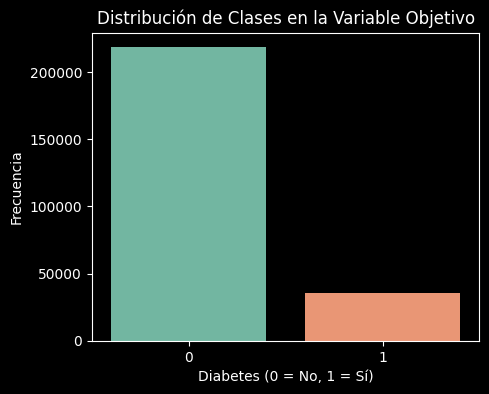

Diabetes_binary
0    0.860667
1    0.139333
Name: proportion, dtype: float64


In [ ]:
# Ver distribuci√≥n de la variable objetivo
plt.figure(figsize=(5,4))
sns.countplot(x=Y.Diabetes_binary, palette="Set2")
plt.title("Distribuci√≥n de Clases en la Variable Objetivo")
plt.xlabel("Diabetes (0 = No, 1 = S√≠)")
plt.ylabel("Frecuencia")
plt.show()

# Ver proporci√≥n de cada clase
print(Y.Diabetes_binary.value_counts(normalize=True))

### Identificaci√≥n de outliers

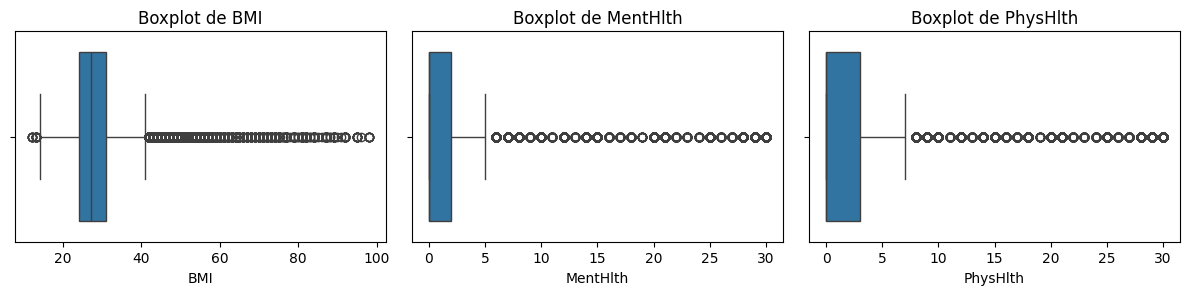

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=X[col])
    plt.title(f"Boxplot de {col}")

plt.tight_layout()
plt.show()

## 1.3. Tipo de datos

In [ ]:
data.dtypes

HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
Diabetes_binary         int64
dtype: object

## 1.4. An√°lisis

### An√°lisis bivariado
Se realiza un tipo de estudio seg√∫n el tipo de variable que sean:
* Num√©rica - num√©rica: **Spearman**.
* Num√©rica - categ√≥rica binaria: **Mann-Whitney U** (se muestra el p valor).
* Num√©rica - categ√≥rica (+3 categor√≠as): **Kruskal-Wallis**.
* Categ√≥rica - categ√≥rica: **Cramer's V**.

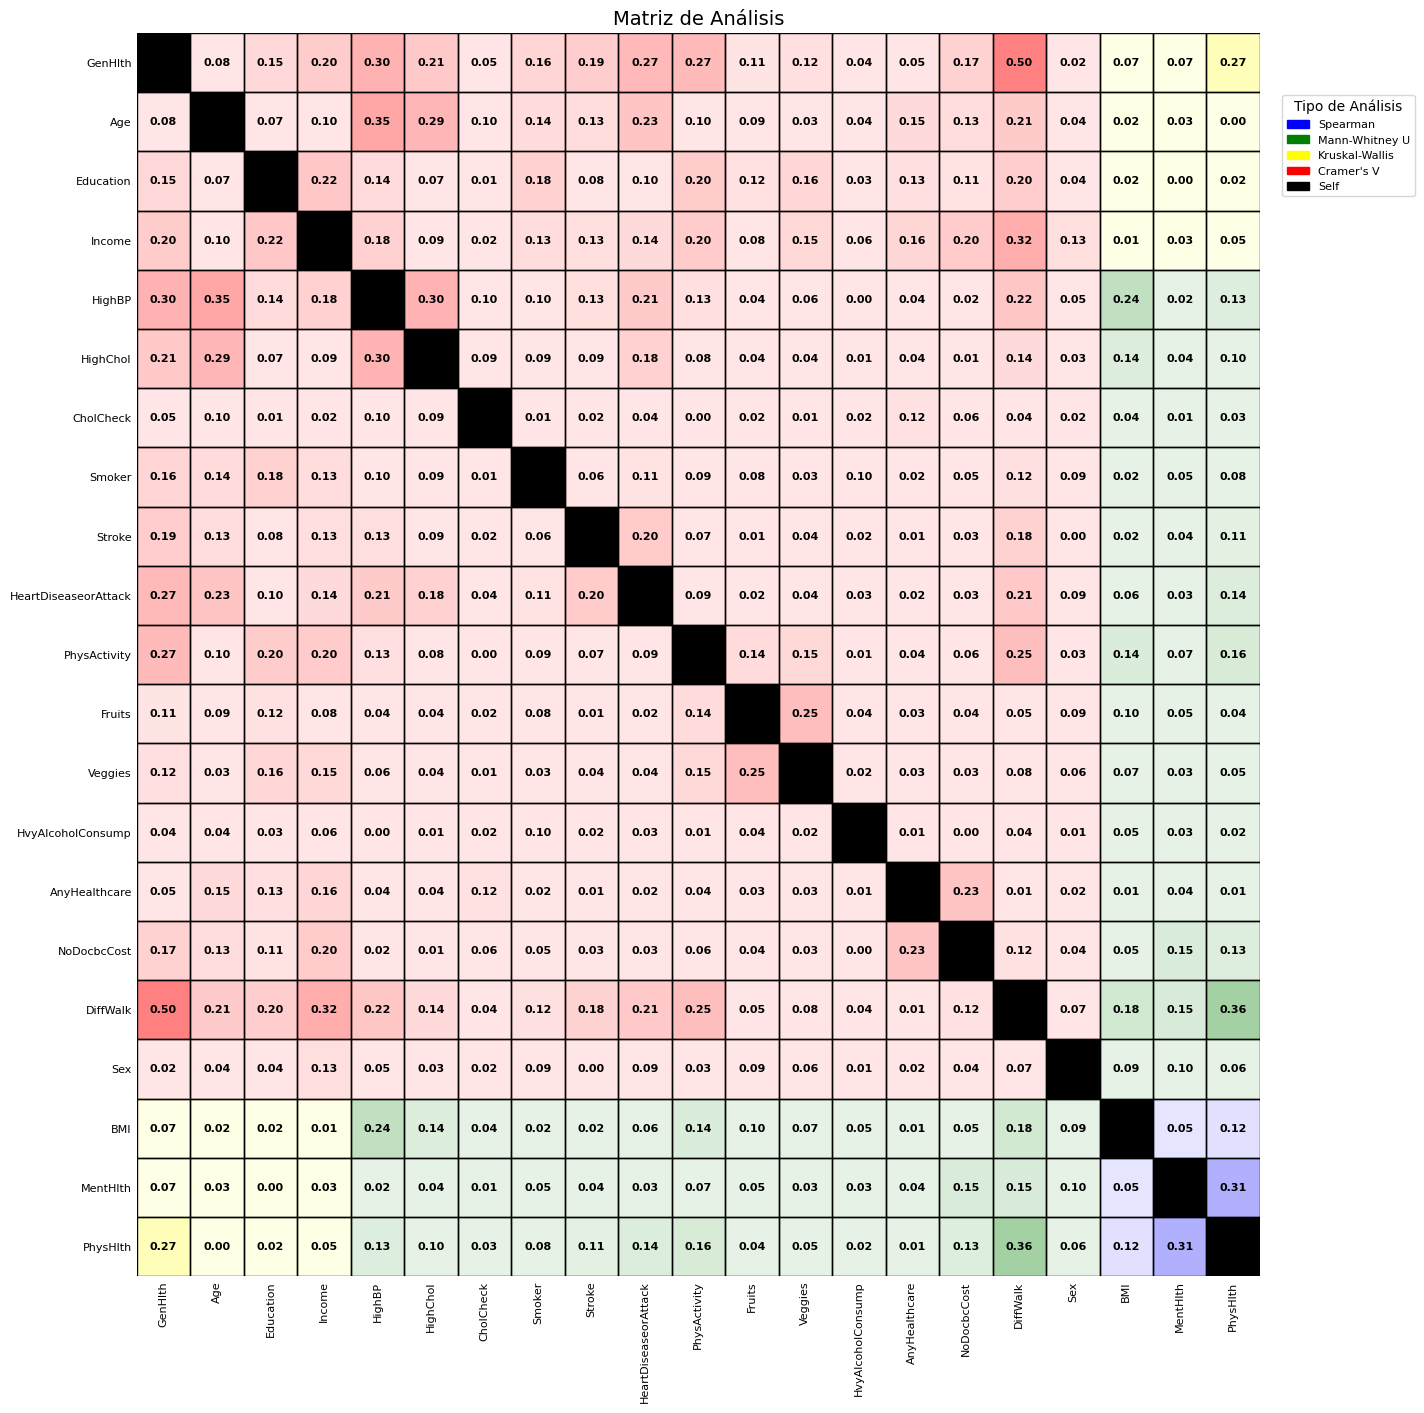

In [ ]:
# Diccionarios para identificaci√≥n r√°pida de variables
categorical_vars = set(categorical_nonbinary_columns + categorical_binary_columns)
binary_vars = set(categorical_binary_columns)

def calculate_metric(x, y, x_is_categorical, y_is_categorical, x_is_binary, y_is_binary):
    if not x_is_categorical and not y_is_categorical:
        # Ambas variables son num√©ricas: uso de correlaci√≥n de Spearman
        metric, p_value = spearmanr(x, y)
        analysis_type = 'Spearman'
    elif not x_is_categorical and y_is_categorical:
        # x num√©rica y y categ√≥rica
        if y_is_binary:
            # Caso binario: Mann-Whitney U con c√°lculo del efecto (r = |z|/sqrt(n1+n2))
            group1 = x[y == 0]
            group2 = x[y == 1]
            n1, n2 = len(group1), len(group2)
            try:
                U, p_value = mannwhitneyu(group1, group2, alternative='two-sided')
                U_mean = n1 * n2 / 2.0
                sigma_U = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12.0)
                z = (U - U_mean) / sigma_U
                metric = abs(z) / np.sqrt(n1 + n2)
            except ValueError:
                metric, p_value = 0, 1.0
            analysis_type = 'Mann-Whitney U'
        else:
            # y categ√≥rica con m√°s de 2 niveles: uso de Kruskal-Wallis y c√°lculo del efecto (eta¬≤)
            groups = [x[y == cat] for cat in np.unique(y)]
            k = len(groups)
            n = len(x)
            if k > 1 and all(len(g) > 1 for g in groups):
                stat, p_value = kruskal(*groups)
                # Efecto estimado: eta¬≤ = (H - k + 1) / (n - k)
                metric = max(0, (stat - (k - 1)) / (n - k))
            else:
                metric, p_value = 0, 1.0
            analysis_type = 'Kruskal-Wallis'
    elif x_is_categorical and not y_is_categorical:
        # x categ√≥rica y y num√©rica (caso an√°logo)
        if x_is_binary:
            group1 = y[x == 0]
            group2 = y[x == 1]
            n1, n2 = len(group1), len(group2)
            try:
                U, p_value = mannwhitneyu(group1, group2, alternative='two-sided')
                U_mean = n1 * n2 / 2.0
                sigma_U = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12.0)
                z = (U - U_mean) / sigma_U
                metric = abs(z) / np.sqrt(n1 + n2)
            except ValueError:
                metric, p_value = 0, 1.0
            analysis_type = 'Mann-Whitney U'
        else:
            groups = [y[x == cat] for cat in np.unique(x)]
            k = len(groups)
            n = len(y)
            if k > 1 and all(len(g) > 1 for g in groups):
                stat, p_value = kruskal(*groups)
                metric = max(0, (stat - (k - 1)) / (n - k))
            else:
                metric, p_value = 0, 1.0
            analysis_type = 'Kruskal-Wallis'
    else:
        # Ambas variables categ√≥ricas: uso de la prueba chi-cuadrado y c√°lculo de Cramer's V
        contingency_table = pd.crosstab(x, y)
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        n_total = contingency_table.values.sum()
        phi2 = chi2 / n_total
        r, k = contingency_table.shape
        try:
            metric = np.sqrt(phi2 / min((k - 1), (r - 1)))
        except ZeroDivisionError:
            metric = 0
        analysis_type = "Cramer's V"
    return metric, p_value, analysis_type

def create_metric_matrix(X, categorical_nonbinary_columns, categorical_binary_columns, numerical_columns):
    all_columns = categorical_nonbinary_columns + categorical_binary_columns + numerical_columns
    n = len(all_columns)
    metric_matrix = np.zeros((n, n))
    analysis_matrix = [[None] * n for _ in range(n)]

    for i in range(n):
        for j in range(n):
            if i == j:
                metric_matrix[i, j] = 1.0
                analysis_matrix[i][j] = 'Self'
            else:
                x = X[all_columns[i]]
                y = X[all_columns[j]]
                x_is_categorical = all_columns[i] in categorical_vars
                y_is_categorical = all_columns[j] in categorical_vars
                x_is_binary = all_columns[i] in binary_vars
                y_is_binary = all_columns[j] in binary_vars
                metric, p_value, analysis_type = calculate_metric(
                    x, y,
                    x_is_categorical, y_is_categorical,
                    x_is_binary, y_is_binary
                )
                metric_matrix[i, j] = metric
                analysis_matrix[i][j] = analysis_type

    metric_df = pd.DataFrame(metric_matrix, index=all_columns, columns=all_columns)
    analysis_df = pd.DataFrame(analysis_matrix, index=all_columns, columns=all_columns)
    return metric_df, analysis_df

# Generar la matriz de an√°lisis
metric_df, analysis_df = create_metric_matrix(
    X,
    categorical_nonbinary_columns,
    categorical_binary_columns,
    numerical_columns
)

# Definir colores para cada tipo de an√°lisis
analysis_colors = {
    "Spearman": "blue",
    "Mann-Whitney U": "green",
    "Kruskal-Wallis": "yellow",
    "Cramer's V": "red",
    "Self": "black"
}

# Graficar la matriz de an√°lisis
fig, ax = plt.subplots(figsize=(18, 14))
for i in range(metric_df.shape[0]):
    for j in range(metric_df.shape[1]):
        value = metric_df.iloc[i, j]
        analysis_type = analysis_df.iloc[i, j]
        color = analysis_colors.get(analysis_type, "white")
        alpha = max(0.1, min(abs(value), 1))  # transparencia en rango [0.1, 1]
        rgba_color = to_rgba(color, alpha)
        rect = plt.Rectangle((j, i), 1, 1, color=rgba_color, ec='black')
        ax.add_patch(rect)
        ax.text(j + 0.5, i + 0.5, '<0.001' if value < 0.001 else f'{value:.2f}',
                ha='center', va='center', fontsize=8, fontweight='bold')

ax.set_xlim(0, metric_df.shape[1])
ax.set_ylim(0, metric_df.shape[0])
ax.invert_yaxis()
ax.set_xticks(np.arange(metric_df.shape[1]) + 0.5)
ax.set_yticks(np.arange(metric_df.shape[0]) + 0.5)
ax.set_xticklabels(metric_df.columns, rotation=90, fontsize=8)
ax.set_yticklabels(metric_df.index, fontsize=8)
ax.tick_params(axis='both', which='both', length=0)
for spine in ax.spines.values():
    spine.set_visible(False)

# Leyenda
legend_patches = [mpatches.Patch(color=color, label=label)
                  for label, color in analysis_colors.items()]
ax.legend(handles=legend_patches, loc='upper left',
          bbox_to_anchor=(1.02, 0.95), borderaxespad=0.0,
          title="Tipo de An√°lisis", fontsize=8)
plt.tight_layout(rect=[0, 0, 0.8, 1])
plt.title("Matriz de An√°lisis", fontsize=14)
plt.show()

Para Correlaci√≥n de Spearman üîµ:
* r < 0.10: Correlaci√≥n despreciable o nula
* 0.10 ‚â§ r < 0.30: Correlaci√≥n peque√±a o d√©bil
* 0.30 ‚â§ r < 0.50: Correlaci√≥n moderada
* 0.50 ‚â§ r < 0.70: Correlaci√≥n alta o fuerte
* r ‚â• 0.70: Correlaci√≥n muy fuerte

Para el Tama√±o del Efecto derivado de la prueba de Mann-Whitney U üü¢(calculado como * r = |z|/‚àö(n‚ÇÅ+n‚ÇÇ)):
* r ‚âà 0.10: Efecto peque√±o
* r ‚âà 0.30: Efecto moderado
* r ‚âà 0.50: Efecto grande

Para la medida de efecto derivada de la prueba de Kruskal-Wallis üü°(usando eta¬≤):
* 0.01 ‚â§ Œ∑¬≤ < 0.06: Efecto peque√±o
* 0.06 ‚â§ Œ∑¬≤ < 0.14: Efecto moderado
* Œ∑¬≤ ‚â• 0.14: Efecto grande

Para Cramer's V üî¥(utilizado en variables categ√≥ricas):
* V < 0.10: Asociaci√≥n despreciable
* 0.10 ‚â§ V < 0.30: Asociaci√≥n d√©bil
* 0.30 ‚â§ V < 0.50: Asociaci√≥n moderada
* V ‚â• 0.50: Asociaci√≥n fuerte

Fuente:
Cohen, J. (1988). Statistical Power Analysis for the Behavioral Sciences (2¬™ ed.). Lawrence Erlbaum Associates.

### Information Gain
obtenido de: https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/

Funciona bien con datos categ√≥ricos, ordinales y binarios y captura relaciones no lineales.

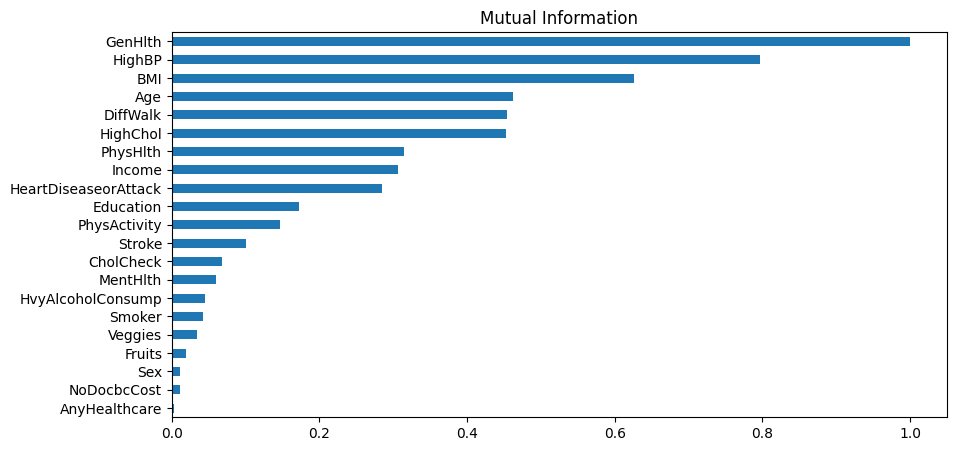

In [ ]:
# Calcular la informaci√≥n mutua
importances = mutual_info_classif(X, Y.Diabetes_binary, discrete_features=True, random_state=42)

# Crear un DataFrame con las importancias de las caracter√≠sticas
feat_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Normalizar las importancias para comparaci√≥n
feat_importances /= feat_importances.max()

# Visualizar las importancias de las caracter√≠sticas
plt.figure(figsize=(10, 5))
feat_importances.sort_values().plot(kind='barh')
plt.title('Mutual Information')
plt.show()

puede ser que el desbalance de las clases afecte a los resultados??

a continuacion:

‚úÖ Se balancea primero el target con SMOTE para evitar que la informaci√≥n mutua est√© sesgada hacia la clase mayoritaria.

‚úÖ En lugar de balancear cada caracter√≠stica individualmente, se realiza un submuestreo general para mantener la estructura de correlaci√≥n entre variables.

‚úÖ Se compara la informaci√≥n mutua antes y despu√©s del balanceo para evaluar posibles efectos artificiales introducidos por SMOTE.

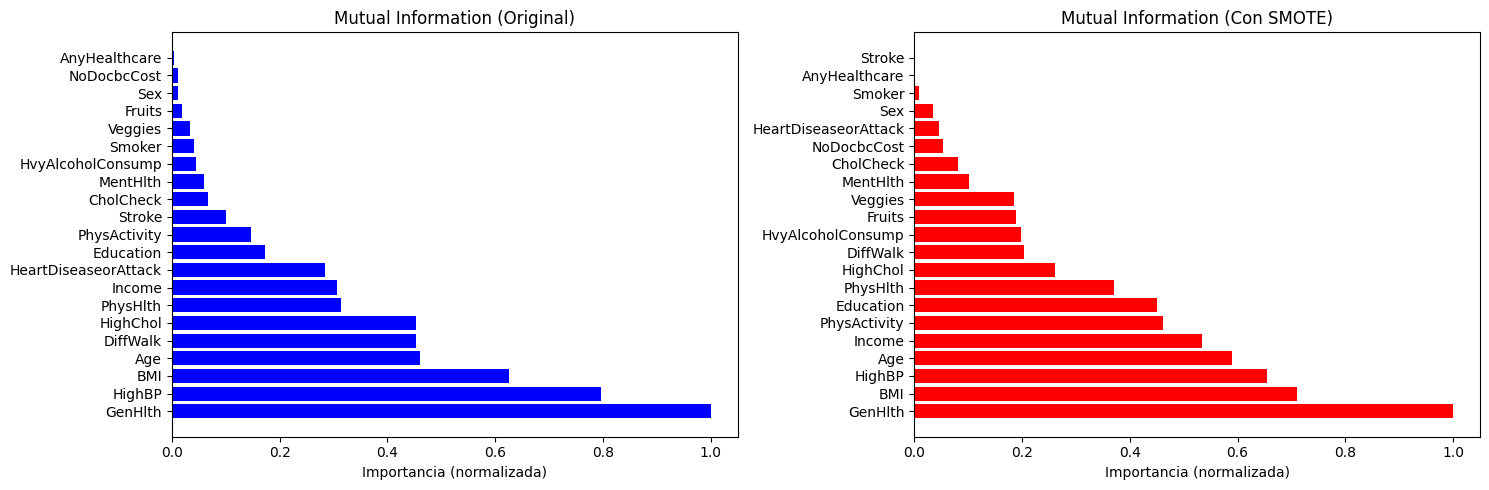

                      Original         SMOTE
Age                   0.461564  5.900373e-01
AnyHealthcare         0.003162  8.047045e-04
BMI                   0.626574  7.093766e-01
CholCheck             0.067869  8.013525e-02
DiffWalk              0.453632  2.035805e-01
Education             0.172791  4.501395e-01
Fruits                0.018651  1.884417e-01
GenHlth               1.000000  1.000000e+00
HeartDiseaseorAttack  0.284593  4.527577e-02
HighBP                0.796362  6.540194e-01
HighChol              0.453215  2.610833e-01
HvyAlcoholConsump     0.045374  1.987966e-01
Income                0.306589  5.338270e-01
MentHlth              0.059504  1.009023e-01
NoDocbcCost           0.010589  5.318546e-02
PhysActivity          0.146907  4.614863e-01
PhysHlth              0.314847  3.710049e-01
Sex                   0.011188  3.471081e-02
Smoker                0.041767  8.438318e-03
Stroke                0.100518  3.771327e-07
Veggies               0.034455  1.848042e-01


In [ ]:
# 1Ô∏è‚É£ Aplicar SMOTE para balancear el target antes del c√°lculo de MI
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, Y.Diabetes_binary)

# 2Ô∏è‚É£ Definir funci√≥n para calcular informaci√≥n mutua sin modificar cada variable individualmente
def calculate_mutual_info(X, y, random_state=42):
    """
    Calcula la informaci√≥n mutua entre cada variable en X y el target y sin modificar las variables individualmente.
    """
    return mutual_info_classif(X, y, discrete_features=True, random_state=random_state)

# 3Ô∏è‚É£ Calcular informaci√≥n mutua en el dataset original (sin balancear)
mi_original = calculate_mutual_info(X, Y.Diabetes_binary)

# 4Ô∏è‚É£ Calcular informaci√≥n mutua en el dataset balanceado con SMOTE
mi_smote = calculate_mutual_info(X_smote, y_smote)

# 5Ô∏è‚É£ Crear DataFrames con los resultados
mi_series_original = pd.Series(mi_original, index=X.columns).sort_values(ascending=False)
mi_series_smote = pd.Series(mi_smote, index=X_smote.columns).sort_values(ascending=False)

# Normalizar ambas series para comparaci√≥n
mi_series_original /= mi_series_original.max()
mi_series_smote /= mi_series_smote.max()

# 6Ô∏è‚É£ Visualizaci√≥n comparativa de Mutual Information antes y despu√©s de SMOTE
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gr√°fico de Mutual Information en el dataset original
axes[0].barh(mi_series_original.index, mi_series_original, color="blue")
axes[0].set_title("Mutual Information (Original)")
axes[0].set_xlabel("Importancia (normalizada)")

# Gr√°fico de Mutual Information en el dataset balanceado con SMOTE
axes[1].barh(mi_series_smote.index, mi_series_smote, color="red")
axes[1].set_title("Mutual Information (Con SMOTE)")
axes[1].set_xlabel("Importancia (normalizada)")

plt.tight_layout()
plt.show()

# Comparar valores num√©ricamente
mi_comparison = pd.DataFrame({"Original": mi_series_original, "SMOTE": mi_series_smote})
print(mi_comparison)

habr√≠a que comentar la capacidad predictiva del modelo con variables que representan objetividad como GenHealth....

### Correlaci√≥n de pearson
No es la mejor opci√≥n dado que la mayor√≠a de variables son categ√≥ricas.

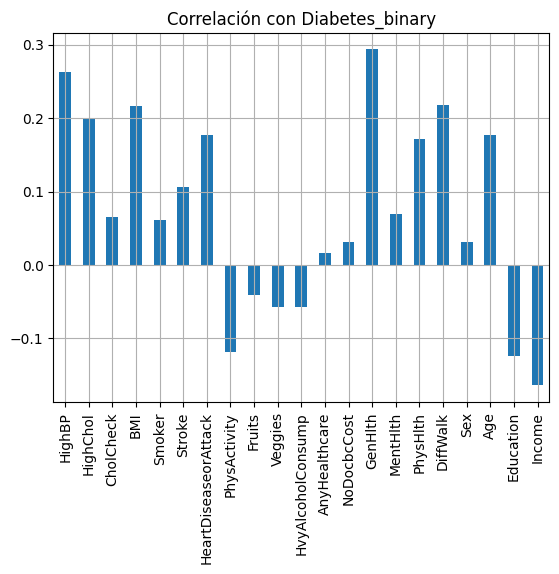

In [ ]:
X.corrwith(Y.Diabetes_binary).plot(kind='bar', grid=True, title="Correlaci√≥n con Diabetes_binary");

# 2. Preprocesamiento


## Eliminaci√≥n de variables

* Estas variables tienen informaci√≥n mutua extremadamente baja en ambos escenarios, lo que indica que no aportan valor predictivo al modelo.
 * **AnyHealthcare**
 * **Sex**
 * **Smoker**
 * **Stroke**
 * **NoDocbcCost**
* Estas variables est√°n correlacionadas con otras.
 * **DiffWalk** (fuertemente correlacionado con GenHlth)
 * **PhysHlth** (fuertemente correlacionado con GenHlth)


// COMENTARIO DE CHATGPT //
üìå An√°lisis de Variables
1Ô∏è‚É£ Variables con MI baja en ambos casos (Candidatas a eliminaci√≥n)

Variable	MI Original	MI SMOTE
AnyHealthcare	0.003162	0.000804

Sex	0.011188	0.034711

Smoker	0.041767	0.008438

Stroke	0.100518	0.0000003

NoDocbcCost	0.010589	0.053185


Estas variables tienen informaci√≥n mutua extremadamente baja en ambos escenarios, lo que indica que no aportan valor predictivo al modelo.
Se recomienda eliminarlas.

2Ô∏è‚É£ Variables con un aumento dr√°stico tras SMOTE (Posibles Sesgos)

Variable	MI Original	MI SMOTE	Aumento (%)

Fruits	0.018651	0.188442	üî∫ +909%

Veggies	0.034455	0.184804	üî∫ +436%

HvyAlcoholConsump	0.045374	0.198796	üî∫ +338%

Si el modelo final va a ser entrenado con datos desbalanceados (sin SMOTE en el entrenamiento), estas variables deben eliminarse porque su alta MI despu√©s de SMOTE no refleja una verdadera relaci√≥n con la variable objetivo.

Si SMOTE se aplicar√° en el entrenamiento del modelo, podr√≠amos dejarlas y validar su impacto en el rendimiento final.

‚ö† Recomendaci√≥n:

üî∏ Si queremos evitar cualquier sesgo, eliminarlas.

üî∏ Si queremos probar su efecto, hacer dos versiones del modelo (con y sin ellas) y comparar.


3Ô∏è‚É£ Variables con reducci√≥n dr√°stica tras SMOTE (Candidatas a eliminaci√≥n)

Variable	MI Original	MI SMOTE	Reducci√≥n (%)

DiffWalk	0.453632	0.203580	üîª -55%

HeartDiseaseorAttack	0.284593	0.045276	üîª -84%

HighChol	0.453215	0.261083	üîª -42%

HeartDiseaseorAttack pierde casi toda su relaci√≥n con la variable objetivo tras SMOTE, por lo que su influencia inicial era probablemente un efecto del desbalanceo.

Recomendamos eliminarla.

DiffWalk y HighChol a√∫n mantienen cierta relevancia tras SMOTE, por lo que podr√≠amos conservarlas.

In [ ]:
# variables definitivas
# Definir las variables a eliminar
deleted_vars = [
    "AnyHealthcare",
    "Sex",
    "NoDocbcCost",
    "Smoker",
    "Stroke",
    "PhysHlth",
    "DiffWalk",
]

# Crear las nuevas X e Y
X_filtered = X.drop(columns=deleted_vars)
Y_filtered = Y.copy()  # No modificamos la variable objetivo

# Actualizar las listas de variables despu√©s de la eliminaci√≥n
numerical_columns_filtered = [col for col in numerical_columns if col not in deleted_vars]
categorical_columns_filtered = [col for col in categorical_columns if col not in deleted_vars]
categorical_nonbinary_columns_filtered = [col for col in categorical_nonbinary_columns if col not in deleted_vars]
categorical_binary_columns_filtered = [col for col in categorical_binary_columns if col not in deleted_vars]

# Imprimir las nuevas listas de variables
print("Variables num√©ricas:", numerical_columns_filtered)
print("Variables categ√≥ricas:", categorical_columns_filtered)
print("Variables categ√≥ricas no binarias:", categorical_nonbinary_columns_filtered)
print("Variables categ√≥ricas binarias:", categorical_binary_columns_filtered)


NameError: name 'X' is not defined

## Tratamiento de Outliers y categorizaci√≥n (BMI)
Segun ([fuente](https://www.nhs.uk/conditions/obesity/)):
* Underweight: Below 18.5
* Normal weight: 18.5‚Äì24.9
* Pre-obesity: 25.0‚Äì29.9
* Obesity class I: 30.0‚Äì34.9
* Obesity class II: 35.0‚Äì39.9
* Obesity class III: Above 40


Como f√≠sicamente creemos que es posible tener un BMI mucho mayor que 40 (p.ej. teniendo una baja estatura y un peso muy elevado), concluimos que vamos a categorizar la variable y no eliminar ninguna fila del dataset.

In [ ]:
# Definir los intervalos y etiquetas de clasificaci√≥n de BMI
bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, np.inf]  # np.inf representa valores mayores a 40
bmi_labels = ["Underweight", "Normal weight", "Pre-obesity", "Obesity class I", "Obesity class II", "Obesity class III"]

# Crear una nueva columna categ√≥rica para BMI
X_filtered["BMI"] = pd.cut(X_filtered["BMI"], bins=bmi_bins, labels=bmi_labels, right=True).cat.codes.astype("int64")

# Actualizar las listas de variables categ√≥ricas y num√©ricas
categorical_columns_filtered.append("BMI")
categorical_nonbinary_columns_filtered.append("BMI")  # Ahora es categ√≥rica con m√°s de 2 niveles

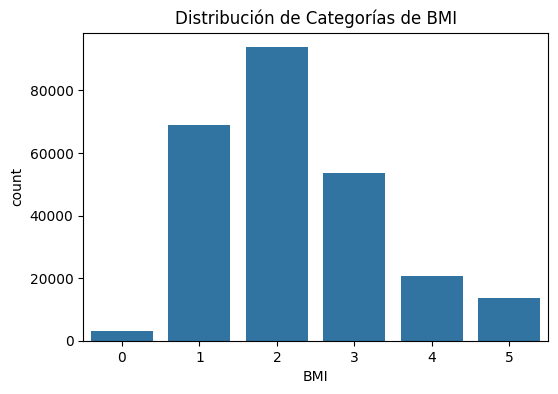

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=X_filtered['BMI'])
plt.title("Distribuci√≥n de Categor√≠as de BMI")
plt.show()

## Train-test split

In [ ]:
# Divisi√≥n en 80% train - 20% test con estratificaci√≥n del target
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, Y_filtered, test_size=0.2, random_state=42, stratify=Y_filtered
)

# Verificar tama√±os de los conjuntos
print("Tama√±o de X_train:", X_train.shape)
print("Tama√±o de X_test:", X_test.shape)
print("Distribuci√≥n del target en entrenamiento:\n", y_train.value_counts(normalize=True))
print("Distribuci√≥n del target en prueba:\n", y_test.value_counts(normalize=True))


Tama√±o de X_train: (202944, 14)
Tama√±o de X_test: (50736, 14)
Distribuci√≥n del target en entrenamiento:
 Diabetes_binary
0                  0.860666
1                  0.139334
Name: proportion, dtype: float64
Distribuci√≥n del target en prueba:
 Diabetes_binary
0                  0.860671
1                  0.139329
Name: proportion, dtype: float64


# 3. Implementaci√≥n de modelo trivial

In [ ]:
# Definir el DummyClassifier que siempre predice la clase mayoritaria
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
dummy_clf.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_dummy = dummy_clf.predict(X_test)

# Calcular AUC como m√©trica principal
auc_dummy = roc_auc_score(y_test, y_pred_dummy)

# Validaci√≥n cruzada (10-Fold CV) para ver estabilidad
cv_scores = cross_val_score(dummy_clf, X_train, y_train, cv=10, scoring="roc_auc")

# Mostrar resultados
print(f"AUC DummyClassifier (Test Set): {auc_dummy:.4f}")
print(f"AUC DummyClassifier (Cross-Validation Mean): {cv_scores.mean():.4f}")
print(f"AUC DummyClassifier (Cross-Validation Std Dev): {cv_scores.std():.4f}")


AUC DummyClassifier (Test Set): 0.5000
AUC DummyClassifier (Cross-Validation Mean): 0.5000
AUC DummyClassifier (Cross-Validation Std Dev): 0.0000


# 4. Implementaci√≥n de modelos predictivos
* para encontrar los mejores parametros: RandomizedSearchCV o Bayesian Optimization
* para balancear las caracter√≠sticas y el target: balanced_weight (en modelos que lo permitan), SMOTE o undersampling
* posteriormente se puede utilizar SHAP para que seleccione automaticamente las variables y comprobar la seleccion que hicimos.

In [ ]:
import multiprocessing
print("N√∫cleos disponibles:", multiprocessing.cpu_count())

N√∫cleos disponibles: 16


In [ ]:
n_jobs = 6  # N√∫mero de n√∫cleos a utilizar

## RandomForestClassifier
Modelo base fuerte, maneja datos categ√≥ricos sin problemas y es robusto.

PARAMETROS  EVALUADOS en RandomForestClassifier:
* **n_estimators** (cantidad de √°rboles): 100 es un buen punto de partida, pero Random Forest suele mejorar hasta ~300-500 √°rboles antes de volverse ineficiente.
Valores mayores a 500 no suelen mejorar el rendimiento significativamente en datasets medianos/grandes. (Breiman, L. (2001). Random Forests en Machine Learning Journal.)
* **max_depth** (profundidad m√°xima del √°rbol): None permite que el √°rbol crezca completamente (puede sobreajustar).
Valores peque√±os (10-20) controlan el overfitting y mejoran la capacidad de generalizaci√≥n.
M√°s de 30 generalmente es innecesario, ya que la mayor√≠a de los datasets no requieren √°rboles tan profundos. (Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning.)
* **min_samples_split** (M√≠nimo de muestras para dividir un nodo): Valores bajos (2-5) permiten que el √°rbol crezca m√°s profundo y capture m√°s patrones.
Valores m√°s altos (10+) reducen la profundidad del √°rbol y evitan el sobreajuste. (Scikit-learn documentation: Empirical Studies on Decision Trees.)
* **min_samples_leaf** (M√≠nimo de muestras en las hojas finales): 1 es el valor predeterminado y permite capturar patrones raros.
2 o 4 evitan ramas muy espec√≠ficas y reducen el sobreajuste. (Breiman, L. (2001). Random Forests.)
* **max_features** (N√∫mero de caracter√≠sticas consideradas en cada split): sqrt (ra√≠z cuadrada del n√∫mero total de features) es la configuraci√≥n est√°ndar en Random Forest.
log2 (logaritmo en base 2 del n√∫mero total de features) reduce a√∫n m√°s la correlaci√≥n entre √°rboles, lo cual puede mejorar estabilidad. (Ho, Tin Kam (1998). Random Decision Forests.)
* **bootstrap** (Uso de muestreo con reemplazo). True (predeterminado) ‚Üí Cada √°rbol se entrena con un subconjunto aleatorio del dataset.
False (Sin reemplazo) ‚Üí Cada √°rbol usa TODO el dataset. (Breiman, L. (2001). Bagging Predictors.)

Nota de RandomizedSearchCV:

RandomizedSearchCV ya incorpora la validaci√≥n cruzada internamente mediante el par√°metro cv (que se define como un StratifiedKFold con 10 folds). Esto significa que, durante la b√∫squeda de hiperpar√°metros, el proceso de validaci√≥n cruzada se ejecuta en cada combinaci√≥n evaluada, por lo que no se ha utilizado cross_val_score. Por otro lado, Optuna no incorpora de forma interna una estrategia de validaci√≥n cruzada, por lo que hemos definido la funci√≥n cross_val_score para evaluar cada conjunto de hiperpar√°metros.

Se calcula el tiempo de ejecuci√≥n de 1 iteraci√≥n del modelo

In [ ]:
import time
from sklearn.ensemble import RandomForestClassifier

# Toma una peque√±a muestra del conjunto de entrenamiento, o ejecuta un solo fold
temp_model = RandomForestClassifier(random_state=42, n_jobs=6)
start = time.time()
temp_model.fit(X_train, y_train)  # O usa un split representativo
end = time.time()
print("Tiempo de entrenamiento para este ajuste (VS CODE): {:.2f} segundos".format(end - start))

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Tiempo de entrenamiento para este ajuste (VS CODE): 5.44 segundos


### Modelo 1: RandomizedSearchCV + balanced_weight

In [ ]:
# Hiperpar√°metros enfocados en balanced_weight
param_distributions_rfc_1 = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Instanciar el RandomForestClassifier
model_rfc_1 = RandomForestClassifier(random_state=42, n_jobs=n_jobs)

# Estrategia de validaci√≥n cruzada estratificada (10 folds)
cv_strategy_rfc_1 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Configurar RandomizedSearchCV optimizando √∫nicamente AUC
random_search_rfc_1 = RandomizedSearchCV(
    estimator=model_rfc_1,
    param_distributions=param_distributions_rfc_1,
    n_iter=25,  # Reducir para limitar el tiempo
    cv=cv_strategy_rfc_1,
    scoring='roc_auc',
    refit=True,
    verbose=2,
    random_state=42,
    n_jobs=n_jobs
)

start_time_rfc_1 = time.time()
random_search_rfc_1.fit(X_train, y_train)
end_time_rfc_1 = time.time()
execution_time_rfc_1 = (end_time_rfc_1 - start_time_rfc_1) / 60

print("Combination 1: RandomizedSearchCV + Balanced Weight")
print("Best hyperparameters found:")
print(random_search_rfc_1.best_params_)
print("Best CV AUC: {:.4f}".format(random_search_rfc_1.best_score_))
print("Total search time: {:.2f} minutes".format(execution_time_rfc_1))

# Evaluaci√≥n final en el conjunto de prueba
best_model_rfc_1 = random_search_rfc_1.best_estimator_
y_pred_proba_rfc_1 = best_model_rfc_1.predict_proba(X_test)[:, 1]
y_pred_rfc_1 = best_model_rfc_1.predict(X_test)

auc_rfc_1 = roc_auc_score(y_test, y_pred_proba_rfc_1)
accuracy_rfc_1 = accuracy_score(y_test, y_pred_rfc_1)
f1_rfc_1 = f1_score(y_test, y_pred_rfc_1)
recall_rfc_1 = recall_score(y_test, y_pred_rfc_1)
precision_rfc_1 = precision_score(y_test, y_pred_rfc_1)
conf_matrix_rfc_1 = confusion_matrix(y_test, y_pred_rfc_1)

print("\nTest set results:")
print("AUC: {:.4f}".format(auc_rfc_1))
print("Accuracy: {:.4f}".format(accuracy_rfc_1))
print("F1 Score: {:.4f}".format(f1_rfc_1))
print("Recall: {:.4f}".format(recall_rfc_1))
print("Precision: {:.4f}".format(precision_rfc_1))
print("Confusion Matrix:")
print(conf_matrix_rfc_1)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Combination 1: RandomizedSearchCV + Balanced Weight
Best hyperparameters found:
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10, 'class_weight': 'balanced', 'bootstrap': True}
Best CV AUC: 0.8250
Total search time: 65.16 minutes

Test set results:
AUC: 0.8205
Accuracy: 0.7252
F1 Score: 0.4387
Recall: 0.7705
Precision: 0.3066
Confusion Matrix:
[[31348 12319]
 [ 1622  5447]]


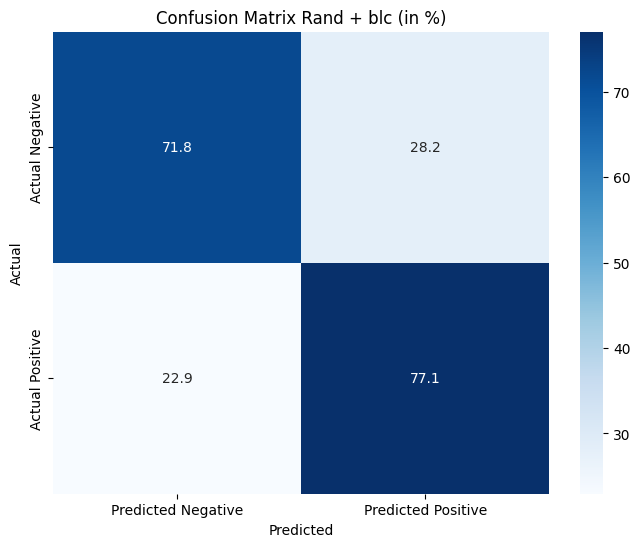

In [ ]:
# Convertir la matriz de confusi√≥n a porcentajes (por fila)
cm_percent = conf_matrix_rfc_1.astype('float') / conf_matrix_rfc_1.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, fmt=".1f", cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Rand + blc (in %)')
plt.show()

### Modelo 2: RandomizedSearchCV + Oversampling

In [ ]:
# Pipeline con SMOTE seguido de RandomForestClassifier
pipeline_rfc_2 = Pipeline([
    ('sampling', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=n_jobs))
])

# Hiperpar√°metros para el clasificador (prefijados con "classifier__")
param_distributions_rfc_2 = {
    'classifier__n_estimators': [100, 300, 500],
    'classifier__max_depth': [None, 10, 20, 30, 40],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__bootstrap': [True, False]
}

cv_strategy_rfc_2 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

random_search_rfc_2 = RandomizedSearchCV(
    estimator=pipeline_rfc_2,
    param_distributions=param_distributions_rfc_2,
    n_iter=25,
    cv=cv_strategy_rfc_2,
    scoring='roc_auc',
    refit=True,
    verbose=2,
    random_state=42,
    n_jobs=n_jobs
)

start_time_rfc_2 = time.time()
random_search_rfc_2.fit(X_train, y_train)
end_time_rfc_2 = time.time()
execution_time_rfc_2 = (end_time_rfc_2 - start_time_rfc_2) / 60

print("Combination 2: RandomizedSearchCV + Oversampling (SMOTE)")
print("Best hyperparameters found:")
print(random_search_rfc_2.best_params_)
print("Best CV AUC: {:.4f}".format(random_search_rfc_2.best_score_))
print("Total search time: {:.2f} minutes".format(execution_time_rfc_2))

# Evaluaci√≥n final en el conjunto de prueba
best_model_rfc_2 = random_search_rfc_2.best_estimator_
y_pred_proba_rfc_2 = best_model_rfc_2.predict_proba(X_test)[:, 1]
y_pred_rfc_2 = best_model_rfc_2.predict(X_test)

auc_rfc_2 = roc_auc_score(y_test, y_pred_proba_rfc_2)
accuracy_rfc_2 = accuracy_score(y_test, y_pred_rfc_2)
f1_rfc_2 = f1_score(y_test, y_pred_rfc_2)
recall_rfc_2 = recall_score(y_test, y_pred_rfc_2)
precision_rfc_2 = precision_score(y_test, y_pred_rfc_2)
conf_matrix_rfc_2 = confusion_matrix(y_test, y_pred_rfc_2)

print("\nTest set results:")
print("AUC: {:.4f}".format(auc_rfc_2))
print("Accuracy: {:.4f}".format(accuracy_rfc_2))
print("F1 Score: {:.4f}".format(f1_rfc_2))
print("Recall: {:.4f}".format(recall_rfc_2))
print("Precision: {:.4f}".format(precision_rfc_2))
print("Confusion Matrix:")
print(conf_matrix_rfc_2)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Combination 2: RandomizedSearchCV + Oversampling (SMOTE)
Best hyperparameters found:
{'classifier__n_estimators': 300, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': 10, 'classifier__bootstrap': False}
Best CV AUC: 0.8176
Total search time: 118.33 minutes

Test set results:
AUC: 0.8134
Accuracy: 0.7052
F1 Score: 0.4260
Recall: 0.7851
Precision: 0.2923
Confusion Matrix:
[[30227 13440]
 [ 1519  5550]]


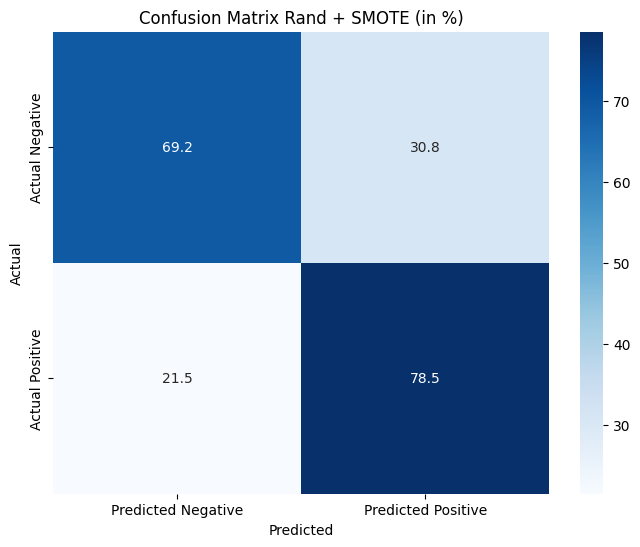

In [ ]:
# Convertir la matriz de confusi√≥n a porcentajes (por fila)
cm_percent = conf_matrix_rfc_2.astype('float') / conf_matrix_rfc_2.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, fmt=".1f", cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Rand + SMOTE (in %)')
plt.show()

### Modelo 3: RandomizedSearchCV + Undersampling

In [ ]:
# Pipeline con RandomUnderSampler seguido de RandomForestClassifier
pipeline_rfc_3 = Pipeline([
    ('sampling', RandomUnderSampler(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=n_jobs))
])

param_distributions_rfc_3 = {
    'classifier__n_estimators': [100, 300, 500],
    'classifier__max_depth': [None, 10, 20, 30, 40],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__bootstrap': [True, False]
}

cv_strategy_rfc_3 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

random_search_rfc_3 = RandomizedSearchCV(
    estimator=pipeline_rfc_3,
    param_distributions=param_distributions_rfc_3,
    n_iter=25,
    cv=cv_strategy_rfc_3,
    scoring='roc_auc',
    refit=True,
    verbose=2,
    random_state=42,
    n_jobs=n_jobs
)

start_time_rfc_3 = time.time()
random_search_rfc_3.fit(X_train, y_train)
end_time_rfc_3 = time.time()
execution_time_rfc_3 = (end_time_rfc_3 - start_time_rfc_3) / 60

print("Combination 3: RandomizedSearchCV + Undersampling")
print("Best hyperparameters found:")
print(random_search_rfc_3.best_params_)
print("Best CV AUC: {:.4f}".format(random_search_rfc_3.best_score_))
print("Total search time: {:.2f} minutes".format(execution_time_rfc_3))

# Evaluaci√≥n final en el conjunto de prueba
best_model_rfc_3 = random_search_rfc_3.best_estimator_
y_pred_proba_rfc_3 = best_model_rfc_3.predict_proba(X_test)[:, 1]
y_pred_rfc_3 = best_model_rfc_3.predict(X_test)

auc_rfc_3 = roc_auc_score(y_test, y_pred_proba_rfc_3)
accuracy_rfc_3 = accuracy_score(y_test, y_pred_rfc_3)
f1_rfc_3 = f1_score(y_test, y_pred_rfc_3)
recall_rfc_3 = recall_score(y_test, y_pred_rfc_3)
precision_rfc_3 = precision_score(y_test, y_pred_rfc_3)
conf_matrix_rfc_3 = confusion_matrix(y_test, y_pred_rfc_3)

print("\nTest set results:")
print("AUC: {:.4f}".format(auc_rfc_3))
print("Accuracy: {:.4f}".format(accuracy_rfc_3))
print("F1 Score: {:.4f}".format(f1_rfc_3))
print("Recall: {:.4f}".format(recall_rfc_3))
print("Precision: {:.4f}".format(precision_rfc_3))
print("Confusion Matrix:")
print(conf_matrix_rfc_3)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Combination 3: RandomizedSearchCV + Undersampling
Best hyperparameters found:
{'classifier__n_estimators': 100, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 2, 'classifier__max_depth': 10, 'classifier__bootstrap': True}
Best CV AUC: 0.8244
Total search time: 8.66 minutes

Test set results:
AUC: 0.8198
Accuracy: 0.7131
F1 Score: 0.4341
Recall: 0.7898
Precision: 0.2993
Confusion Matrix:
[[30596 13071]
 [ 1486  5583]]


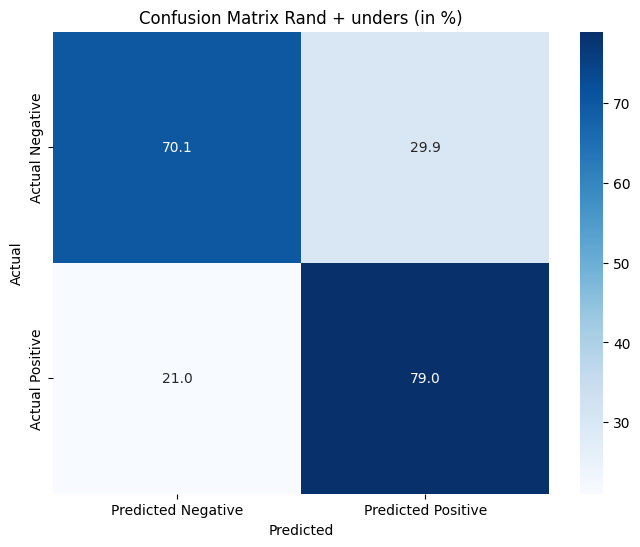

In [ ]:
# Convertir la matriz de confusi√≥n a porcentajes (por fila)
cm_percent = conf_matrix_rfc_3.astype('float') / conf_matrix_rfc_3.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, fmt=".1f", cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Rand + unders (in %)')
plt.show()

### Modelo 4: Optuna + balanced_weight

In [ ]:
def objective_bw_rfc_4(trial):
    n_estimators = trial.suggest_categorical('n_estimators', [100, 300, 500])
    max_depth = trial.suggest_categorical('max_depth', [None, 10, 20, 30, 40])
    min_samples_split = trial.suggest_categorical('min_samples_split', [2, 5])
    min_samples_leaf = trial.suggest_categorical('min_samples_leaf', [1, 2])
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])
    class_weight = trial.suggest_categorical('class_weight', ['balanced', 'balanced_subsample'])

    model_rfc_4 = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        bootstrap=bootstrap,
        class_weight=class_weight,
        random_state=42,
        n_jobs=n_jobs
    )

    cv_strategy_rfc_4 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(model_rfc_4, X_train, y_train, cv=cv_strategy_rfc_4, scoring='roc_auc', n_jobs=n_jobs)
    return np.mean(scores)

start_time_optuna_bw_rfc_4 = time.time()
study_bw_rfc_4 = optuna.create_study(direction='maximize')
study_bw_rfc_4.optimize(objective_bw_rfc_4, n_trials=25)
end_time_optuna_bw_rfc_4 = time.time()
execution_time_optuna_bw_rfc_4 = (end_time_optuna_bw_rfc_4 - start_time_optuna_bw_rfc_4) / 60

print("Combination 4: Optuna + Balanced Weight")
print("Best trial:")
print(study_bw_rfc_4.best_trial)
print("Total optimization time: {:.2f} minutes".format(execution_time_optuna_bw_rfc_4))

# Construir el modelo final con los mejores par√°metros y evaluar en X_test
best_params_rfc_4 = study_bw_rfc_4.best_trial.params

best_model_rfc_4 = RandomForestClassifier(
    n_estimators=best_params_rfc_4['n_estimators'],
    max_depth=best_params_rfc_4['max_depth'],
    min_samples_split=best_params_rfc_4['min_samples_split'],
    min_samples_leaf=best_params_rfc_4['min_samples_leaf'],
    bootstrap=best_params_rfc_4['bootstrap'],
    class_weight=best_params_rfc_4['class_weight'],
    random_state=42,
    n_jobs=n_jobs
)

best_model_rfc_4.fit(X_train, y_train)

y_pred_proba_rfc_4 = best_model_rfc_4.predict_proba(X_test)[:, 1]
y_pred_rfc_4 = best_model_rfc_4.predict(X_test)

auc_rfc_4 = roc_auc_score(y_test, y_pred_proba_rfc_4)
accuracy_rfc_4 = accuracy_score(y_test, y_pred_rfc_4)
f1_rfc_4 = f1_score(y_test, y_pred_rfc_4)
recall_rfc_4 = recall_score(y_test, y_pred_rfc_4)
precision_rfc_4 = precision_score(y_test, y_pred_rfc_4)
conf_matrix_rfc_4 = confusion_matrix(y_test, y_pred_rfc_4)

print("\nTest set results:")
print("AUC: {:.4f}".format(auc_rfc_4))
print("Accuracy: {:.4f}".format(accuracy_rfc_4))
print("F1 Score: {:.4f}".format(f1_rfc_4))
print("Recall: {:.4f}".format(recall_rfc_4))
print("Precision: {:.4f}".format(precision_rfc_4))
print("Confusion Matrix:")
print(conf_matrix_rfc_4)

[I 2025-03-29 09:44:09,411] A new study created in memory with name: no-name-9bc71e83-a73a-4dac-85b5-f3e70fcd2ddb
[I 2025-03-29 09:48:40,841] Trial 0 finished with value: 0.7771372843399619 and parameters: {'n_estimators': 500, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 2, 'bootstrap': False, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.7771372843399619.
[I 2025-03-29 09:49:18,591] Trial 1 finished with value: 0.7435190158811718 and parameters: {'n_estimators': 100, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': True, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.7771372843399619.
[I 2025-03-29 09:52:20,676] Trial 2 finished with value: 0.7937904766137983 and parameters: {'n_estimators': 500, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 2, 'bootstrap': True, 'class_weight': 'balanced'}. Best is trial 2 with value: 0.7937904766137983.
[I 2025-03-29 09:54:29,792] Trial 3 finished with value: 0.7952

Combination 4: Optuna + Balanced Weight
Best trial:
FrozenTrial(number=7, state=TrialState.COMPLETE, values=[0.825058922513335], datetime_start=datetime.datetime(2025, 3, 29, 9, 57, 58, 592733), datetime_complete=datetime.datetime(2025, 3, 29, 10, 0, 28, 371984), params={'n_estimators': 500, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 1, 'bootstrap': True, 'class_weight': 'balanced'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': CategoricalDistribution(choices=(100, 300, 500)), 'max_depth': CategoricalDistribution(choices=(None, 10, 20, 30, 40)), 'min_samples_split': CategoricalDistribution(choices=(2, 5)), 'min_samples_leaf': CategoricalDistribution(choices=(1, 2)), 'bootstrap': CategoricalDistribution(choices=(True, False)), 'class_weight': CategoricalDistribution(choices=('balanced', 'balanced_subsample'))}, trial_id=7, value=None)
Total optimization time: 57.74 minutes

Test set results:
AUC: 0.8205
Accuracy: 0.7251
F1 Scor

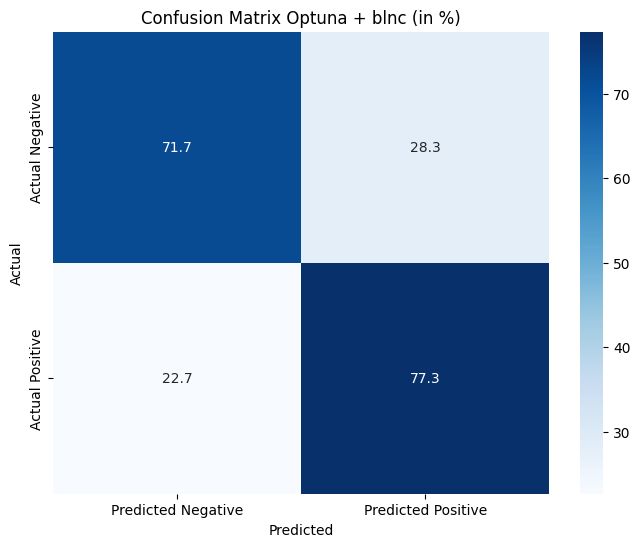

In [ ]:
# Convertir la matriz de confusi√≥n a porcentajes (por fila)
cm_percent = conf_matrix_rfc_4.astype('float') / conf_matrix_rfc_4.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, fmt=".1f", cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Optuna + blnc (in %)')
plt.show()

### Modelo 5: Optuna + Oversampling

In [ ]:
def objective_os_rfc_5(trial):
    n_estimators = trial.suggest_categorical('n_estimators', [100, 300, 500])
    max_depth = trial.suggest_categorical('max_depth', [None, 10, 20, 30, 40])
    min_samples_split = trial.suggest_categorical('min_samples_split', [2, 5])
    min_samples_leaf = trial.suggest_categorical('min_samples_leaf', [1, 2])
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])

    pipeline_rfc_5 = Pipeline([
        ('sampling', SMOTE(random_state=42)),
        ('classifier', RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            bootstrap=bootstrap,
            random_state=42,
            n_jobs=n_jobs
        ))
    ])

    cv_strategy_rfc_5 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline_rfc_5, X_train, y_train, cv=cv_strategy_rfc_5, scoring='roc_auc', n_jobs=n_jobs)
    return np.mean(scores)

start_time_optuna_os_rfc_5 = time.time()
study_os_rfc_5 = optuna.create_study(direction='maximize')
study_os_rfc_5.optimize(objective_os_rfc_5, n_trials=25)
end_time_optuna_os_rfc_5 = time.time()
execution_time_optuna_os_rfc_5 = (end_time_optuna_os_rfc_5 - start_time_optuna_os_rfc_5) / 60

print("Combination 5: Optuna + Oversampling (SMOTE)")
print("Best trial:")
print(study_os_rfc_5.best_trial)
print("Total optimization time: {:.2f} minutes".format(execution_time_optuna_os_rfc_5))

# Construir el modelo final con los mejores par√°metros y evaluar en X_test
best_params_rfc_5 = study_os_rfc_5.best_trial.params

pipeline_rfc_5 = Pipeline([
    ('sampling', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(
        n_estimators=best_params_rfc_5['n_estimators'],
        max_depth=best_params_rfc_5['max_depth'],
        min_samples_split=best_params_rfc_5['min_samples_split'],
        min_samples_leaf=best_params_rfc_5['min_samples_leaf'],
        bootstrap=best_params_rfc_5['bootstrap'],
        random_state=42,
        n_jobs=n_jobs
    ))
])

pipeline_rfc_5.fit(X_train, y_train)

y_pred_proba_rfc_5 = pipeline_rfc_5.predict_proba(X_test)[:, 1]
y_pred_rfc_5 = pipeline_rfc_5.predict(X_test)

auc_rfc_5 = roc_auc_score(y_test, y_pred_proba_rfc_5)
accuracy_rfc_5 = accuracy_score(y_test, y_pred_rfc_5)
f1_rfc_5 = f1_score(y_test, y_pred_rfc_5)
recall_rfc_5 = recall_score(y_test, y_pred_rfc_5)
precision_rfc_5 = precision_score(y_test, y_pred_rfc_5)
conf_matrix_rfc_5 = confusion_matrix(y_test, y_pred_rfc_5)

print("\nTest set results:")
print("AUC: {:.4f}".format(auc_rfc_5))
print("Accuracy: {:.4f}".format(accuracy_rfc_5))
print("F1 Score: {:.4f}".format(f1_rfc_5))
print("Recall: {:.4f}".format(recall_rfc_5))
print("Precision: {:.4f}".format(precision_rfc_5))
print("Confusion Matrix:")
print(conf_matrix_rfc_5)

[I 2025-03-29 13:01:18,381] A new study created in memory with name: no-name-393b8e4e-9220-4981-81ae-8985e5b8b53e
[I 2025-03-29 13:11:56,778] Trial 0 finished with value: 0.7395980947711214 and parameters: {'n_estimators': 500, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 0 with value: 0.7395980947711214.
[I 2025-03-29 13:18:48,808] Trial 1 finished with value: 0.7859497509822078 and parameters: {'n_estimators': 500, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 2, 'bootstrap': False}. Best is trial 1 with value: 0.7859497509822078.
[I 2025-03-29 13:23:27,750] Trial 2 finished with value: 0.7393282692817182 and parameters: {'n_estimators': 300, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 1 with value: 0.7859497509822078.
[I 2025-03-29 13:24:37,563] Trial 3 finished with value: 0.8173773054407579 and parameters: {'n_estimators': 100, 'max_depth': 10, 'min_samples_spl

Combination 5: Optuna + Oversampling (SMOTE)
Best trial:
FrozenTrial(number=16, state=TrialState.COMPLETE, values=[0.8175932399846658], datetime_start=datetime.datetime(2025, 3, 29, 13, 56, 5, 967635), datetime_complete=datetime.datetime(2025, 3, 29, 13, 59, 20, 682684), params={'n_estimators': 300, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 1, 'bootstrap': False}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': CategoricalDistribution(choices=(100, 300, 500)), 'max_depth': CategoricalDistribution(choices=(None, 10, 20, 30, 40)), 'min_samples_split': CategoricalDistribution(choices=(2, 5)), 'min_samples_leaf': CategoricalDistribution(choices=(1, 2)), 'bootstrap': CategoricalDistribution(choices=(True, False))}, trial_id=16, value=None)
Total optimization time: 86.40 minutes


c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Test set results:
AUC: 0.8134
Accuracy: 0.7059
F1 Score: 0.4262
Recall: 0.7840
Precision: 0.2926
Confusion Matrix:
[[30271 13396]
 [ 1527  5542]]


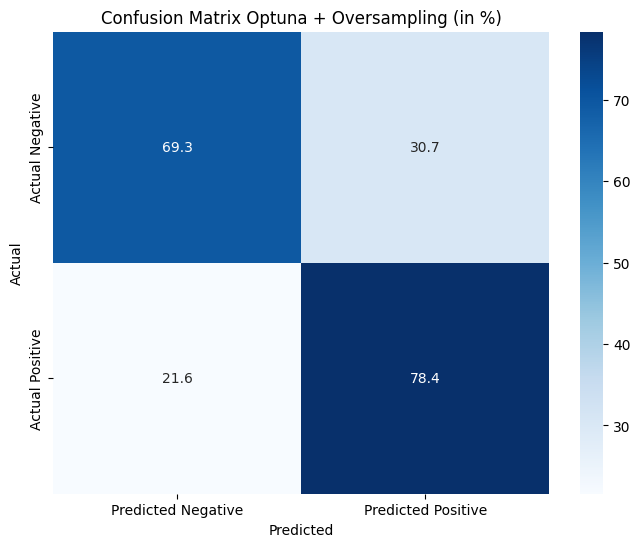

In [ ]:
# Convertir la matriz de confusi√≥n a porcentajes (por fila)
cm_percent = conf_matrix_rfc_5.astype('float') / conf_matrix_rfc_5.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, fmt=".1f", cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Optuna + Oversampling (in %)')
plt.show()

### Modelo 6: Optuna + Undersampling

In [ ]:
def objective_us_rfc_6(trial):
    n_estimators = trial.suggest_categorical('n_estimators', [100, 300, 500])
    max_depth = trial.suggest_categorical('max_depth', [None, 10, 20, 30, 40])
    min_samples_split = trial.suggest_categorical('min_samples_split', [2, 5])
    min_samples_leaf = trial.suggest_categorical('min_samples_leaf', [1, 2])
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])

    pipeline_rfc_6 = Pipeline([
        ('sampling', RandomUnderSampler(random_state=42)),
        ('classifier', RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            bootstrap=bootstrap,
            random_state=42,
            n_jobs=n_jobs
        ))
    ])

    cv_strategy_rfc_6 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline_rfc_6, X_train, y_train, cv=cv_strategy_rfc_6, scoring='roc_auc', n_jobs=n_jobs)
    return np.mean(scores)

start_time_optuna_us_rfc_6 = time.time()
study_us_rfc_6 = optuna.create_study(direction='maximize')
study_us_rfc_6.optimize(objective_us_rfc_6, n_trials=25)
end_time_optuna_us_rfc_6 = time.time()
execution_time_optuna_us_rfc_6 = (end_time_optuna_us_rfc_6 - start_time_optuna_us_rfc_6) / 60

print("Combination 6: Optuna + Undersampling")
print("Best trial:")
print(study_us_rfc_6.best_trial)
print("Total optimization time: {:.2f} minutes".format(execution_time_optuna_us_rfc_6))

# Construir el modelo final con los mejores par√°metros y evaluar en X_test
best_params_rfc_6 = study_us_rfc_6.best_trial.params

pipeline_rfc_6 = Pipeline([
    ('sampling', RandomUnderSampler(random_state=42)),
    ('classifier', RandomForestClassifier(
        n_estimators=best_params_rfc_6['n_estimators'],
        max_depth=best_params_rfc_6['max_depth'],
        min_samples_split=best_params_rfc_6['min_samples_split'],
        min_samples_leaf=best_params_rfc_6['min_samples_leaf'],
        bootstrap=best_params_rfc_6['bootstrap'],
        random_state=42,
        n_jobs=n_jobs
    ))
])

pipeline_rfc_6.fit(X_train, y_train)

y_pred_proba_rfc_6 = pipeline_rfc_6.predict_proba(X_test)[:, 1]
y_pred_rfc_6 = pipeline_rfc_6.predict(X_test)

auc_rfc_6 = roc_auc_score(y_test, y_pred_proba_rfc_6)
accuracy_rfc_6 = accuracy_score(y_test, y_pred_rfc_6)
f1_rfc_6 = f1_score(y_test, y_pred_rfc_6)
recall_rfc_6 = recall_score(y_test, y_pred_rfc_6)
precision_rfc_6 = precision_score(y_test, y_pred_rfc_6)
conf_matrix_rfc_6 = confusion_matrix(y_test, y_pred_rfc_6)

print("\nTest set results:")
print("AUC: {:.4f}".format(auc_rfc_6))
print("Accuracy: {:.4f}".format(accuracy_rfc_6))
print("F1 Score: {:.4f}".format(f1_rfc_6))
print("Recall: {:.4f}".format(recall_rfc_6))
print("Precision: {:.4f}".format(precision_rfc_6))
print("Confusion Matrix:")
print(conf_matrix_rfc_6)

[I 2025-03-29 14:47:05,072] A new study created in memory with name: no-name-e21f7a9b-6037-453f-8507-c0dbc606284d
[I 2025-03-29 14:47:34,352] Trial 0 finished with value: 0.8124142270854623 and parameters: {'n_estimators': 500, 'max_depth': 40, 'min_samples_split': 5, 'min_samples_leaf': 2, 'bootstrap': True}. Best is trial 0 with value: 0.8124142270854623.
[I 2025-03-29 14:47:59,255] Trial 1 finished with value: 0.8124142270854623 and parameters: {'n_estimators': 500, 'max_depth': 40, 'min_samples_split': 5, 'min_samples_leaf': 2, 'bootstrap': True}. Best is trial 0 with value: 0.8124142270854623.
[I 2025-03-29 14:48:17,186] Trial 2 finished with value: 0.8246855528281933 and parameters: {'n_estimators': 500, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 2 with value: 0.8246855528281933.
[I 2025-03-29 14:48:36,003] Trial 3 finished with value: 0.8011944265045463 and parameters: {'n_estimators': 300, 'max_depth': 30, 'min_samples_spli

Combination 6: Optuna + Undersampling
Best trial:
FrozenTrial(number=2, state=TrialState.COMPLETE, values=[0.8246855528281933], datetime_start=datetime.datetime(2025, 3, 29, 14, 47, 59, 256978), datetime_complete=datetime.datetime(2025, 3, 29, 14, 48, 17, 186922), params={'n_estimators': 500, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': True}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': CategoricalDistribution(choices=(100, 300, 500)), 'max_depth': CategoricalDistribution(choices=(None, 10, 20, 30, 40)), 'min_samples_split': CategoricalDistribution(choices=(2, 5)), 'min_samples_leaf': CategoricalDistribution(choices=(1, 2)), 'bootstrap': CategoricalDistribution(choices=(True, False))}, trial_id=2, value=None)
Total optimization time: 6.62 minutes

Test set results:
AUC: 0.8202
Accuracy: 0.7148
F1 Score: 0.4350
Recall: 0.7882
Precision: 0.3004
Confusion Matrix:
[[30692 12975]
 [ 1497  5572]]


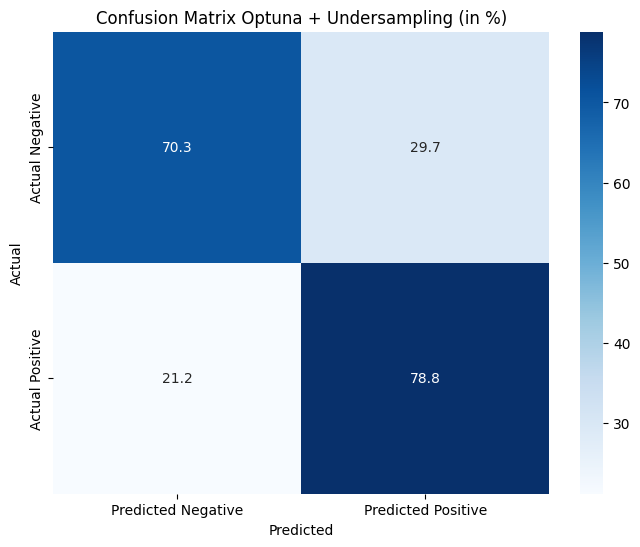

In [ ]:
# Convertir la matriz de confusi√≥n a porcentajes (por fila)
cm_percent = conf_matrix_rfc_6.astype('float') / conf_matrix_rfc_6.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, fmt=".1f", cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Optuna + Undersampling (in %)')
plt.show()

### Resumen y conclusiones
Si bien la combinaci√≥n Optuna + Balanced Weight ofrec√≠a el AUC m√°s alto, la combinaci√≥n Optuna + Undersampling se defini√≥ como la preferida por su relativa rapidez de c√≥mputo y un AUC que, si bien es algo menor, sigue siendo competitivo (por encima de 0.81). Es por ello que **se va a emplear la combinaci√≥n Optuna-Undersampling** para el resto de los modelos (aunque sabemos que no se deber√≠a asumir que es la mejor combinaci√≥n para todos los modelos).

* El **AUC** de **0.8202** indica que el modelo tiene una buena capacidad para discriminar entre los pacientes saludables y los prediab√©ticos/diab√©ticos.

* Una **accuracy** revela que el **71.48%** de las predicciones del modelo son correctas (verdaderos positivos y verdaderos negativos).

* El **recall**  revela que el modelo identifica correctamente casi **79 de cada 10** casos positivos.

* La **precision** ndica que de todos los casos clasificados como positivos, solo el **30.04%** son realmente positivos.

* De la **matriz de confusi√≥n** se observa que:

    * Falsos positivos: 12,975 casos fueron clasificados err√≥neamente como positivos cuando en realidad eran negativos.

    * Falsos negativos: 1,497 casos no fueron detectados, lo que est√° en l√≠nea con el recall obtenido.

Esta distribuci√≥n confirma que el modelo tiende a favorecer la detecci√≥n de positivos (alto recall), lo que es beneficioso en aplicaciones cl√≠nicas donde se prefiere errar en exceso hacia falsos positivos en lugar de perder casos verdaderamente positivos.

La optimizaci√≥n con Optuna utilizando undersampling se complet√≥ en solo **6.62 minutos**, lo que es muy eficiente comparado con otras estrategias.

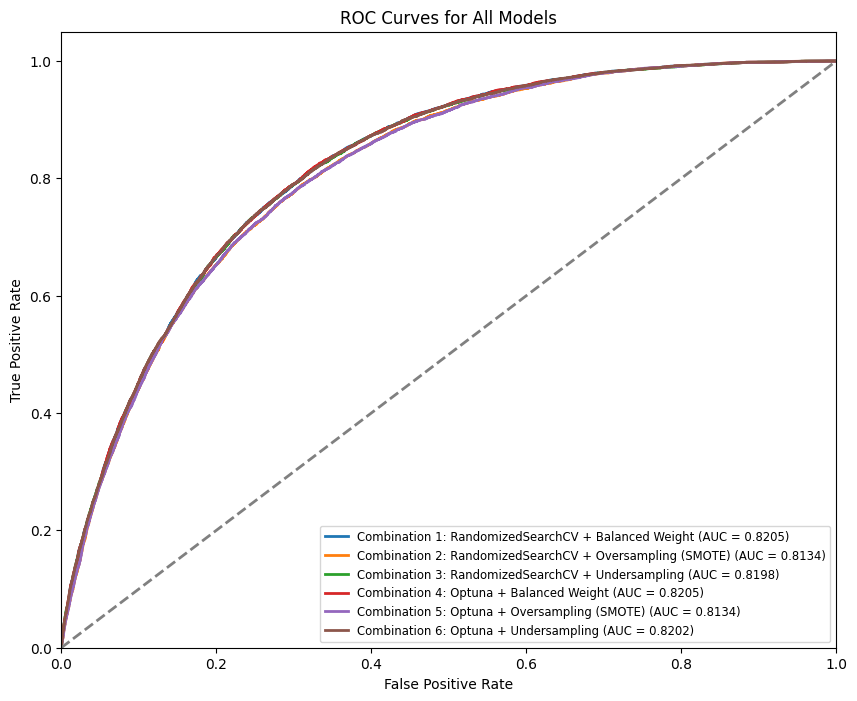

Summary Table:


Model       AUC  \
0       Combination 1: RandomizedSearchCV + Balanced Weight  0.820458   
1  Combination 2: RandomizedSearchCV + Oversampling (SMOTE)  0.813402   
2         Combination 3: RandomizedSearchCV + Undersampling  0.819767   
3                   Combination 4: Optuna + Balanced Weight  0.820475   
4              Combination 5: Optuna + Oversampling (SMOTE)  0.813370   
5                     Combination 6: Optuna + Undersampling  0.820157   

   Accuracy  F1 Score    Recall  Precision  Execution Time (minutes)  
0  0.725225  0.438655  0.770547   0.306597                 65.157761  
1  0.705160  0.425956  0.785118   0.292259                118.331002  
2  0.713083  0.434086  0.789786   0.299292                  8.657308  
3  0.725067  0.439326  0.773094   0.306850                 57.737785  
4  0.705870  0.426193  0.783986   0.292639                 86.398656  
5  0.714759  0.435041  0.788230   0.300426                  6.619149

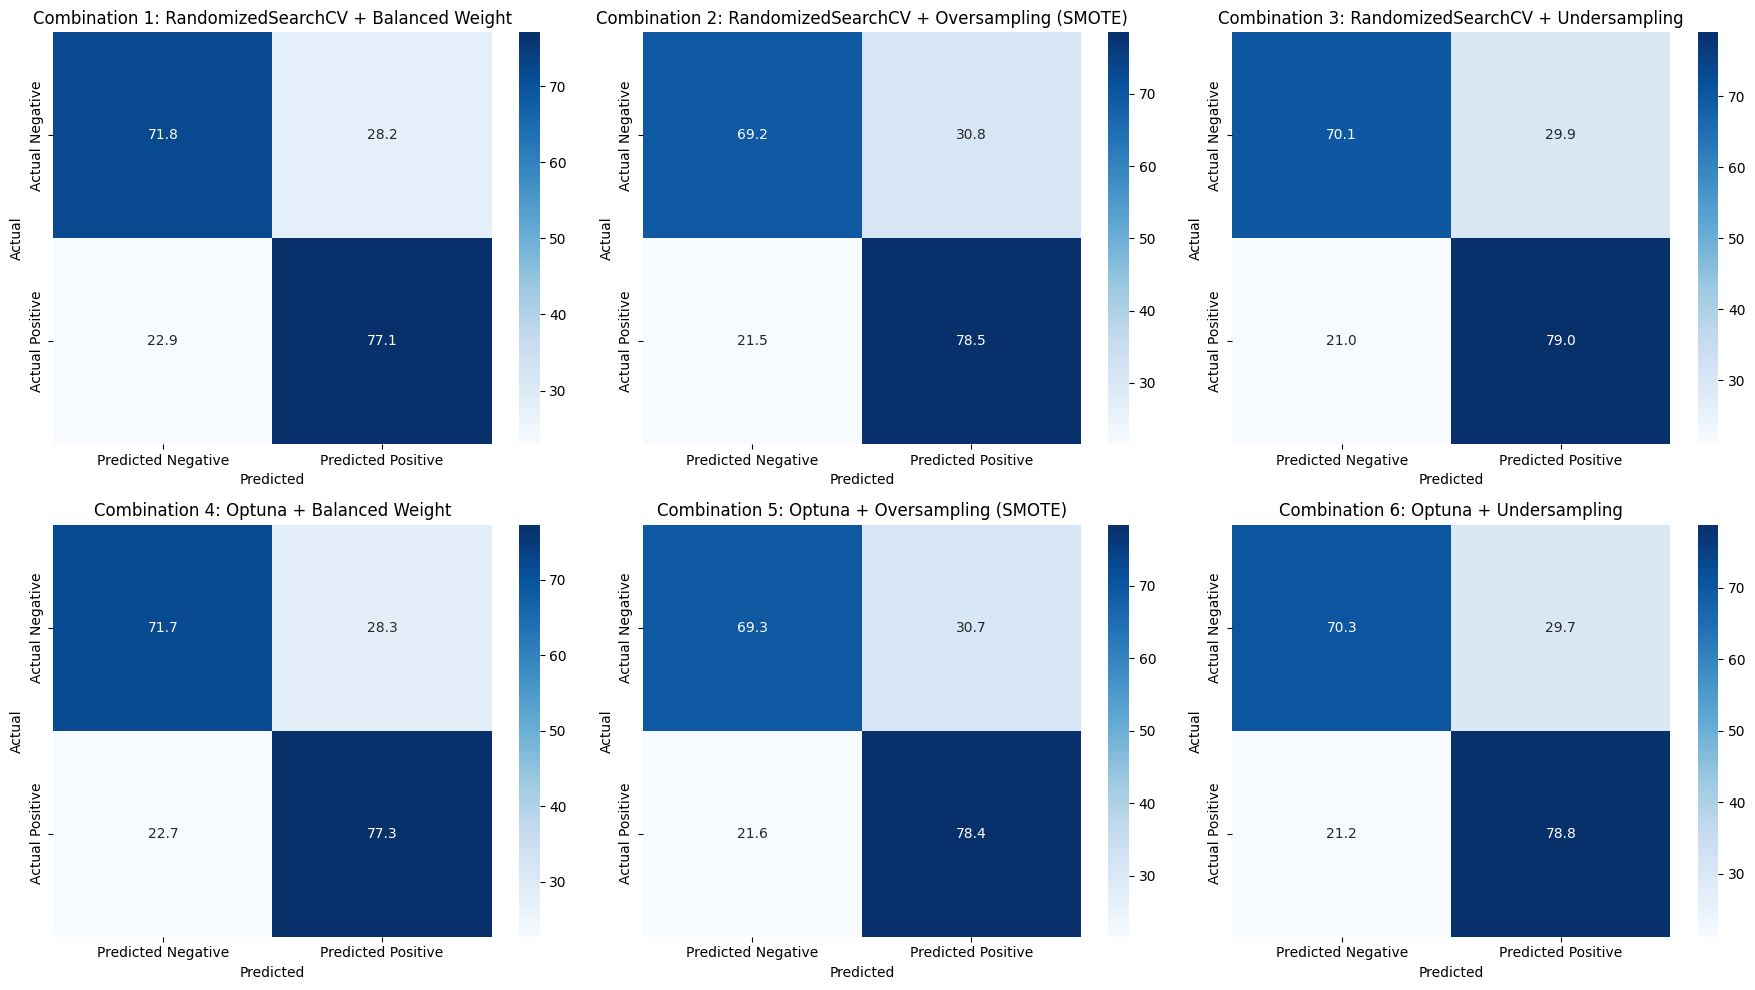

In [ ]:
# Creamos el diccionario model_results incluyendo todas las m√©tricas:
model_results = [
    {
        "model": "Combination 1: RandomizedSearchCV + Balanced Weight",
        "auc": auc_rfc_1,
        "accuracy": accuracy_rfc_1,
        "f1": f1_rfc_1,
        "recall": recall_rfc_1,
        "precision": precision_rfc_1,
        "time": execution_time_rfc_1,
        "y_pred_proba": y_pred_proba_rfc_1,
        "conf_matrix": conf_matrix_rfc_1
    },
    {
        "model": "Combination 2: RandomizedSearchCV + Oversampling (SMOTE)",
        "auc": auc_rfc_2,
        "accuracy": accuracy_rfc_2,
        "f1": f1_rfc_2,
        "recall": recall_rfc_2,
        "precision": precision_rfc_2,
        "time": execution_time_rfc_2,
        "y_pred_proba": y_pred_proba_rfc_2,
        "conf_matrix": conf_matrix_rfc_2
    },
    {
        "model": "Combination 3: RandomizedSearchCV + Undersampling",
        "auc": auc_rfc_3,
        "accuracy": accuracy_rfc_3,
        "f1": f1_rfc_3,
        "recall": recall_rfc_3,
        "precision": precision_rfc_3,
        "time": execution_time_rfc_3,
        "y_pred_proba": y_pred_proba_rfc_3,
        "conf_matrix": conf_matrix_rfc_3
    },
    {
        "model": "Combination 4: Optuna + Balanced Weight",
        "auc": auc_rfc_4,
        "accuracy": accuracy_rfc_4,
        "f1": f1_rfc_4,
        "recall": recall_rfc_4,
        "precision": precision_rfc_4,
        "time": execution_time_optuna_bw_rfc_4,
        "y_pred_proba": y_pred_proba_rfc_4,
        "conf_matrix": conf_matrix_rfc_4
    },
    {
        "model": "Combination 5: Optuna + Oversampling (SMOTE)",
        "auc": auc_rfc_5,
        "accuracy": accuracy_rfc_5,
        "f1": f1_rfc_5,
        "recall": recall_rfc_5,
        "precision": precision_rfc_5,
        "time": execution_time_optuna_os_rfc_5,
        "y_pred_proba": y_pred_proba_rfc_5,
        "conf_matrix": conf_matrix_rfc_5
    },
    {
        "model": "Combination 6: Optuna + Undersampling",
        "auc": auc_rfc_6,
        "accuracy": accuracy_rfc_6,
        "f1": f1_rfc_6,
        "recall": recall_rfc_6,
        "precision": precision_rfc_6,
        "time": execution_time_optuna_us_rfc_6,
        "y_pred_proba": y_pred_proba_rfc_6,
        "conf_matrix": conf_matrix_rfc_6
    }
]

# =============================================================================
# 1. Plotear las curvas ROC de todos los modelos
# =============================================================================
plt.figure(figsize=(10, 8))
for res in model_results:
    fpr, tpr, _ = roc_curve(y_test, res["y_pred_proba"])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='{} (AUC = {:.4f})'.format(res["model"], roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc="lower right", fontsize='small')
plt.show()

# =============================================================================
# 2. Crear una tabla con todos los par√°metros calculados
# =============================================================================
summary_data = {
    "Model": [res["model"] for res in model_results],
    "AUC": [res["auc"] for res in model_results],
    "Accuracy": [res["accuracy"] for res in model_results],
    "F1 Score": [res["f1"] for res in model_results],
    "Recall": [res["recall"] for res in model_results],
    "Precision": [res["precision"] for res in model_results],
    "Execution Time (minutes)": [res["time"] for res in model_results]
}
summary_df = pd.DataFrame(summary_data)
print("Summary Table:")
display(summary_df)

# =============================================================================
# 3. Plotear la matriz de confusi√≥n (en porcentajes) de todos los modelos
# =============================================================================
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()
for i, res in enumerate(model_results):
    cm_percent = res["conf_matrix"].astype('float') / res["conf_matrix"].sum(axis=1)[:, np.newaxis] * 100
    sns.heatmap(cm_percent, annot=True, fmt=".1f", cmap='Blues', ax=axs[i],
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    axs[i].set_title(res["model"])
    axs[i].set_ylabel('Actual')
    axs[i].set_xlabel('Predicted')
plt.tight_layout()
plt.show()



---
Nota

---

Aunque no se ha implementado validaci√≥n cruzada anidada (nested cross-validation) debido a su alto coste computacional, se ha utilizado una combinaci√≥n de validaci√≥n cruzada estratificada de 10 particiones y conjunto de test externo para garantizar una evaluaci√≥n robusta del modelo, tal como se exige en la pr√°ctica. Esta estrategia ofrece una estimaci√≥n fiable del rendimiento sin requerir los recursos computacionales adicionales que implicar√≠a la anidaci√≥n.

## LightGBM
M√°s r√°pido y eficiente que GradientBoostingClassifier, ideal para datasets grandes.

### Modelo 1

In [ ]:
def objective_lgbm_1(trial):
    # Definir el espacio de hiperpar√°metros para LightGBM
    n_estimators = trial.suggest_categorical('n_estimators', [100, 300, 500])
    max_depth = trial.suggest_categorical('max_depth', [-1, 10, 20, 30, 40])
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.5, log=True)
    num_leaves = trial.suggest_categorical('num_leaves', [20, 31, 40, 50])
    min_child_samples = trial.suggest_categorical('min_child_samples', [5, 10, 20])
    subsample = trial.suggest_float('subsample', 0.6, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.6, 1.0)
    reg_alpha = trial.suggest_float('reg_alpha', 0.0, 1.0)
    reg_lambda = trial.suggest_float('reg_lambda', 0.0, 1.0)

    # Crear el pipeline que integra undersampling y LightGBM
    pipeline_lgbm_1 = Pipeline([
        ('sampling', RandomUnderSampler(random_state=42)),
        ('classifier', LGBMClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            learning_rate=learning_rate,
            num_leaves=num_leaves,
            min_child_samples=min_child_samples,
            subsample=subsample,
            colsample_bytree=colsample_bytree,
            reg_alpha=reg_alpha,
            reg_lambda=reg_lambda,
            random_state=42,
            n_jobs=n_jobs
        ))
    ])

    cv_strategy_lgbm_1 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    # Utiliza cross_val_score para la validaci√≥n cruzada autom√°tica
    scores = cross_val_score(pipeline_lgbm_1, X_train, y_train, cv=cv_strategy_lgbm_1, scoring='roc_auc', n_jobs=n_jobs)
    return np.mean(scores)

start_time_optuna_lgbm_1 = time.time()
study_lgbm_1 = optuna.create_study(direction='maximize')
study_lgbm_1.optimize(objective_lgbm_1, n_trials=200)
end_time_optuna_lgbm_1 = time.time()
execution_time_optuna_lgbm_1 = (end_time_optuna_lgbm_1 - start_time_optuna_lgbm_1) / 60

print("Combination LGBM 1: Optuna + Undersampling")
print("Best trial:")
print(study_lgbm_1.best_trial)
print("Total optimization time: {:.2f} minutes".format(execution_time_optuna_lgbm_1))

# Construir el modelo final con los mejores par√°metros y evaluar en X_test
best_params_lgbm_1 = study_lgbm_1.best_trial.params

pipeline_lgbm_1 = Pipeline([
    ('sampling', RandomUnderSampler(random_state=42)),
    ('classifier', LGBMClassifier(
        n_estimators=best_params_lgbm_1['n_estimators'],
        max_depth=best_params_lgbm_1['max_depth'],
        learning_rate=best_params_lgbm_1['learning_rate'],
        num_leaves=best_params_lgbm_1['num_leaves'],
        min_child_samples=best_params_lgbm_1['min_child_samples'],
        subsample=best_params_lgbm_1['subsample'],
        colsample_bytree=best_params_lgbm_1['colsample_bytree'],
        reg_alpha=best_params_lgbm_1['reg_alpha'],
        reg_lambda=best_params_lgbm_1['reg_lambda'],
        random_state=42,
        n_jobs=n_jobs
    ))
])

pipeline_lgbm_1.fit(X_train, y_train)

y_pred_proba_lgbm_1 = pipeline_lgbm_1.predict_proba(X_test)[:, 1]
y_pred_lgbm_1 = pipeline_lgbm_1.predict(X_test)

auc_lgbm_1 = roc_auc_score(y_test, y_pred_proba_lgbm_1)
accuracy_lgbm_1 = accuracy_score(y_test, y_pred_lgbm_1)
f1_lgbm_1 = f1_score(y_test, y_pred_lgbm_1)
recall_lgbm_1 = recall_score(y_test, y_pred_lgbm_1)
precision_lgbm_1 = precision_score(y_test, y_pred_lgbm_1)
conf_matrix_lgbm_1 = confusion_matrix(y_test, y_pred_lgbm_1)

print("\nTest set results for LightGBM (Optuna + Undersampling):")
print("AUC: {:.4f}".format(auc_lgbm_1))
print("Accuracy: {:.4f}".format(accuracy_lgbm_1))
print("F1 Score: {:.4f}".format(f1_lgbm_1))
print("Recall: {:.4f}".format(recall_lgbm_1))
print("Precision: {:.4f}".format(precision_lgbm_1))
print("Confusion Matrix:")
print(conf_matrix_lgbm_1)

[I 2025-03-31 10:19:50,973] A new study created in memory with name: no-name-5abd8502-9163-4823-8f12-1cbec635c21d
[I 2025-03-31 10:19:56,194] Trial 0 finished with value: 0.8263915879585527 and parameters: {'n_estimators': 300, 'max_depth': -1, 'learning_rate': 0.012777422917813544, 'num_leaves': 40, 'min_child_samples': 5, 'subsample': 0.9029843998326423, 'colsample_bytree': 0.8018369471164261, 'reg_alpha': 0.7546570495865349, 'reg_lambda': 0.9173727467384064}. Best is trial 0 with value: 0.8263915879585527.
[I 2025-03-31 10:19:57,897] Trial 1 finished with value: 0.8208267018926328 and parameters: {'n_estimators': 100, 'max_depth': 30, 'learning_rate': 0.35006243665573533, 'num_leaves': 31, 'min_child_samples': 5, 'subsample': 0.6012623146895468, 'colsample_bytree': 0.6822917955447174, 'reg_alpha': 0.1357415520600781, 'reg_lambda': 0.6793928163424254}. Best is trial 0 with value: 0.8263915879585527.
[I 2025-03-31 10:20:00,046] Trial 2 finished with value: 0.8236955931683336 and param

Combination LGBM 1: Optuna + Undersampling
Best trial:
FrozenTrial(number=136, state=TrialState.COMPLETE, values=[0.8272515680310532], datetime_start=datetime.datetime(2025, 3, 31, 10, 31, 38, 777119), datetime_complete=datetime.datetime(2025, 3, 31, 10, 31, 44, 611671), params={'n_estimators': 500, 'max_depth': 30, 'learning_rate': 0.015792431789729295, 'num_leaves': 20, 'min_child_samples': 5, 'subsample': 0.9043150846986479, 'colsample_bytree': 0.6000994198105087, 'reg_alpha': 0.9443716549904781, 'reg_lambda': 0.9621248496474444}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': CategoricalDistribution(choices=(100, 300, 500)), 'max_depth': CategoricalDistribution(choices=(-1, 10, 20, 30, 40)), 'learning_rate': FloatDistribution(high=0.5, log=True, low=0.001, step=None), 'num_leaves': CategoricalDistribution(choices=(20, 31, 40, 50)), 'min_child_samples': CategoricalDistribution(choices=(5, 10, 20)), 'subsample': FloatDistribution(high=1.0, log=

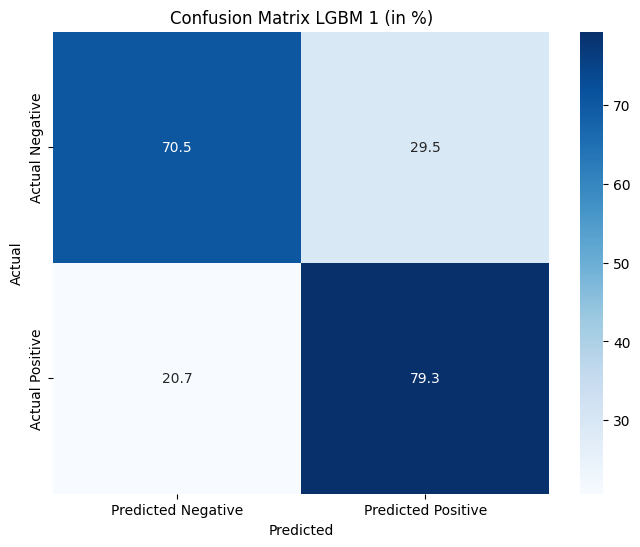

In [ ]:
# Convertir la matriz de confusi√≥n a porcentajes (por fila)
cm_percent = conf_matrix_lgbm_1.astype('float') / conf_matrix_lgbm_1.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, fmt=".1f", cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix LGBM 1 (in %)')
plt.show()

probamos a aumentar el espacio de hiperpar√°metros y el n√∫mero de iteraciones

### Modelo 2

La elecci√≥n de este espacio de hiperpar√°metros ampliado se fundamenta en la necesidad de adaptar el modelo LightGBM a la complejidad del conjunto de datos de salud y diabetes, caracterizado por un alto grado de heterogeneidad y desbalanceo de clases. Diversos estudios en el √°rea de boosting y optimizaci√≥n de hiperpar√°metros han mostrado que explorar un rango amplio de configuraciones permite capturar de manera m√°s precisa las interacciones y no linealidades presentes en los datos.

Por ejemplo, se ha decidido ampliar el rango de n_estimators (de 100 a 500) para permitir al modelo aprender gradualmente y as√≠ evitar tanto el subajuste como el sobreajuste. Seg√∫n Ke et al. (2017), un mayor n√∫mero de √°rboles puede mejorar la capacidad del modelo para capturar patrones complejos, aunque con el riesgo inherente de sobreajuste, que se mitiga combin√°ndolo con otros par√°metros de regularizaci√≥n. En este sentido, la inclusi√≥n de reg_alpha y reg_lambda, que aplican regularizaci√≥n L1 y L2 respectivamente, ayuda a controlar la complejidad del modelo, siguiendo recomendaciones que se han consolidado en la literatura sobre m√©todos de boosting, como se evidencia en los trabajos de Chen y Guestrin (2016).

El par√°metro max_depth se incluye con la opci√≥n de no limitar la profundidad (-1) junto con valores espec√≠ficos, lo que permite ajustar la complejidad de cada √°rbol. Esta flexibilidad es fundamental, ya que una profundidad excesiva puede llevar a un modelo muy especializado en el conjunto de entrenamiento, mientras que una profundidad insuficiente puede resultar en un subajuste. Asimismo, el par√°metro learning_rate se ha definido en un rango logar√≠tmico (0.001 a 0.5) para equilibrar la velocidad de convergencia y la estabilidad del proceso de entrenamiento, una estrategia recomendada en estudios sobre optimizaci√≥n de hiperpar√°metros (Bergstra y Bengio, 2012).

Adem√°s, se han incluido par√°metros espec√≠ficos que afectan la estructura interna de los √°rboles, como num_leaves y min_child_samples. Estos determinan, respectivamente, la complejidad y el tama√±o m√≠nimo de cada hoja, permitiendo al modelo ajustar finamente la representaci√≥n de los datos y reducir el riesgo de sobreajuste, como se ha demostrado emp√≠ricamente en investigaciones recientes (Ke et al., 2017).

La incorporaci√≥n de subsample y colsample_bytree introduce aleatoriedad en la selecci√≥n de instancias y caracter√≠sticas, lo cual es clave para reducir la varianza del modelo. Estos par√°metros, en combinaci√≥n con t√©cnicas de muestreo como bagging_fraction y bagging_freq, contribuyen a mejorar la robustez del modelo frente a variaciones en los datos, una estrategia ampliamente adoptada en aplicaciones de boosting.

Finalmente, par√°metros como min_split_gain y max_bin se incluyen para garantizar que las divisiones en el √°rbol sean significativas y que la discretizaci√≥n de las caracter√≠sticas se realice de forma eficiente, mientras que scale_pos_weight se ajusta espec√≠ficamente para abordar el desbalanceo de clases, permitiendo que la clase minoritaria reciba el peso adecuado durante el entrenamiento.

En conjunto, este espacio de b√∫squeda ampliado permite una exploraci√≥n exhaustiva de las posibles configuraciones, lo que aumenta la probabilidad de encontrar una combinaci√≥n √≥ptima que maximice el rendimiento del modelo en t√©rminos de m√©tricas como el AUC. Esta estrategia se alinea con las mejores pr√°cticas sugeridas en la literatura y con las recomendaciones derivadas de estudios emp√≠ricos en problemas similares de clasificaci√≥n en salud.

In [ ]:
def objective_lgbm_2(trial):
    # Definir el espacio de hiperpar√°metros ampliado para LightGBM
    n_estimators = trial.suggest_categorical('n_estimators', [100, 200, 300, 400, 500])
    max_depth = trial.suggest_categorical('max_depth', [-1, 5, 10, 20, 30, 40])
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.5, log=True)
    num_leaves = trial.suggest_int('num_leaves', 20, 100)  # rango ampliado para mayor exploraci√≥n
    min_child_samples = trial.suggest_int('min_child_samples', 5, 50)  # rango ampliado
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)
    reg_alpha = trial.suggest_float('reg_alpha', 0.0, 1.0)
    reg_lambda = trial.suggest_float('reg_lambda', 0.0, 1.0)
    bagging_fraction = trial.suggest_float('bagging_fraction', 0.5, 1.0)
    bagging_freq = trial.suggest_int('bagging_freq', 1, 10)
    min_split_gain = trial.suggest_float('min_split_gain', 0.0, 0.5)
    scale_pos_weight = trial.suggest_float('scale_pos_weight', 1.0, 10.0)
    max_bin = trial.suggest_int('max_bin', 50, 500)

    # Crear el pipeline que integra undersampling y LightGBM
    pipeline_lgbm_2 = Pipeline([
        ('sampling', RandomUnderSampler(random_state=42)),
        ('classifier', LGBMClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            learning_rate=learning_rate,
            num_leaves=num_leaves,
            min_child_samples=min_child_samples,
            subsample=subsample,
            colsample_bytree=colsample_bytree,
            reg_alpha=reg_alpha,
            reg_lambda=reg_lambda,
            bagging_fraction = bagging_fraction,
            bagging_freq = bagging_freq,
            min_split_gain = min_split_gain,
            scale_pos_weight = scale_pos_weight,
            max_bin = max_bin,
            random_state=42,
            n_jobs=n_jobs
        ))
    ])

    cv_strategy_lgbm_2 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    # Utiliza cross_val_score para la validaci√≥n cruzada autom√°tica
    scores = cross_val_score(pipeline_lgbm_2, X_train, y_train, cv=cv_strategy_lgbm_2, scoring='roc_auc', n_jobs=n_jobs)
    return np.mean(scores)

start_time_optuna_lgbm_2 = time.time()
study_lgbm_2 = optuna.create_study(direction='maximize')
study_lgbm_2.optimize(objective_lgbm_2, n_trials=400)  # Aumentar el n√∫mero de pruebas para una mejor b√∫squeda
end_time_optuna_lgbm_2 = time.time()
execution_time_optuna_lgbm_2 = (end_time_optuna_lgbm_1 - start_time_optuna_lgbm_2) / 60

print("LGBM 2: Optuna + Undersampling")
print("Best trial:")
print(study_lgbm_2.best_trial)
print("Total optimization time: {:.2f} minutes".format(execution_time_optuna_lgbm_2))

# Construir el modelo final con los mejores par√°metros y evaluar en X_test
best_params_lgbm_2 = study_lgbm_2.best_trial.params

pipeline_lgbm_2 = Pipeline([
    ('sampling', RandomUnderSampler(random_state=42)),
    ('classifier', LGBMClassifier(
        n_estimators=best_params_lgbm_2['n_estimators'],
        max_depth=best_params_lgbm_2['max_depth'],
        learning_rate=best_params_lgbm_2['learning_rate'],
        num_leaves=best_params_lgbm_2['num_leaves'],
        min_child_samples=best_params_lgbm_2['min_child_samples'],
        subsample=best_params_lgbm_2['subsample'],
        colsample_bytree=best_params_lgbm_2['colsample_bytree'],
        reg_alpha=best_params_lgbm_2['reg_alpha'],
        reg_lambda=best_params_lgbm_2['reg_lambda'],
        random_state=42,
        n_jobs=n_jobs
    ))
])

pipeline_lgbm_2.fit(X_train, y_train)

y_pred_proba_lgbm_2 = pipeline_lgbm_2.predict_proba(X_test)[:, 1]
y_pred_lgbm_2 = pipeline_lgbm_2.predict(X_test)

auc_lgbm_2 = roc_auc_score(y_test, y_pred_proba_lgbm_2)
accuracy_lgbm_2 = accuracy_score(y_test, y_pred_lgbm_2)
f1_lgbm_2 = f1_score(y_test, y_pred_lgbm_2)
recall_lgbm_2 = recall_score(y_test, y_pred_lgbm_2)
precision_lgbm_2 = precision_score(y_test, y_pred_lgbm_2)
conf_matrix_lgbm_2 = confusion_matrix(y_test, y_pred_lgbm_2)

print("\nTest set results for LightGBM (Optuna + Undersampling):")
print("AUC: {:.4f}".format(auc_lgbm_2))
print("Accuracy: {:.4f}".format(accuracy_lgbm_2))
print("F1 Score: {:.4f}".format(f1_lgbm_2))
print("Recall: {:.4f}".format(recall_lgbm_2))
print("Precision: {:.4f}".format(precision_lgbm_2))
print("Confusion Matrix:")
print(conf_matrix_lgbm_2)

[I 2025-03-31 10:43:22,648] A new study created in memory with name: no-name-d0173896-037f-4e65-ad76-ba5371b2b22f
[I 2025-03-31 10:43:34,363] Trial 0 finished with value: 0.8255739243406083 and parameters: {'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.0354840807041935, 'num_leaves': 41, 'min_child_samples': 12, 'subsample': 0.6900579745466471, 'colsample_bytree': 0.5917581310968842, 'reg_alpha': 0.5207369882048893, 'reg_lambda': 0.30032330919860883, 'bagging_fraction': 0.5748416391293509, 'bagging_freq': 10, 'min_split_gain': 0.38852862307142777, 'scale_pos_weight': 3.45746963814167, 'max_bin': 229}. Best is trial 0 with value: 0.8255739243406083.
[I 2025-03-31 10:43:48,721] Trial 1 finished with value: 0.8257380648035836 and parameters: {'n_estimators': 500, 'max_depth': 30, 'learning_rate': 0.004093248134821421, 'num_leaves': 94, 'min_child_samples': 28, 'subsample': 0.6320440732274273, 'colsample_bytree': 0.7186846543993695, 'reg_alpha': 0.8205036537531143, 'reg_lambda':

LGBM 2: Optuna + Undersampling
Best trial:
FrozenTrial(number=347, state=TrialState.COMPLETE, values=[0.8274482692208576], datetime_start=datetime.datetime(2025, 3, 31, 11, 27, 55, 324558), datetime_complete=datetime.datetime(2025, 3, 31, 11, 28, 3, 441063), params={'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.020165672314882276, 'num_leaves': 100, 'min_child_samples': 14, 'subsample': 0.8484349483938471, 'colsample_bytree': 0.514511685824827, 'reg_alpha': 0.6763368699300196, 'reg_lambda': 0.404626592865411, 'bagging_fraction': 0.8622571271513763, 'bagging_freq': 3, 'min_split_gain': 0.4430129853648599, 'scale_pos_weight': 1.1588900395848256, 'max_bin': 101}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': CategoricalDistribution(choices=(100, 200, 300, 400, 500)), 'max_depth': CategoricalDistribution(choices=(-1, 5, 10, 20, 30, 40)), 'learning_rate': FloatDistribution(high=0.5, log=True, low=0.001, step=None), 'num_leaves': IntDistribu

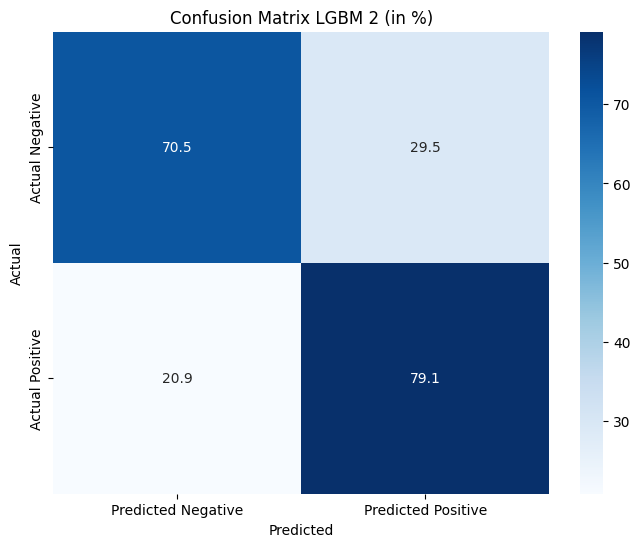

In [ ]:
# Convertir la matriz de confusi√≥n a porcentajes (por fila)
cm_percent = conf_matrix_lgbm_2.astype('float') / conf_matrix_lgbm_2.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, fmt=".1f", cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix LGBM 2 (in %)')
plt.show()

El aumento del n√∫mero de trials (junto con el tiempo de c√≥mputo) no mejora significativamente el rendimiento del modelo.

### Resumen y conclusiones
Ambos experimentos muestran un desempe√±o pr√°cticamente id√©ntico en t√©rminos de AUC, accuracy, F1, recall y precision, lo que indica que:

* El **AUC** se mantiene en **0.8233** en ambos casos, evidenciando que la capacidad del modelo para discriminar entre las clases es constante.
* La **accuracy** es pr√°cticamente la misma (0.7171 vs 0.7170), lo que sugiere que la tasa global de aciertos no se ve afectada por la ampliaci√≥n del espacio de hiperpar√°metros.
* Los valores de **F1**, **recall** y **precision** difieren muy ligeramente (F1: 0.4387 vs 0.4379; recall: 0.7933 vs 0.7913; precision: 0.3032 vs 0.3027), diferencias que son estad√≠sticamente insignificantes.
* La **matriz de confusi√≥n** presenta peque√±as variaciones en los n√∫meros, lo que confirma que los cambios en la b√∫squeda de hiperpar√°metros no impactaron sustancialmente en la clasificaci√≥n de las instancias.

En resumen, la exploraci√≥n de un espacio de hiperpar√°metros ampliado con 400 iteraciones no mejora significativamente el rendimiento respecto al espacio reducido con 200 iteraciones. Esto sugiere que, en este escenario, el espacio reducido ya capturaba las configuraciones √≥ptimas y, por lo tanto, a partir de ahora se emplear√° **n_iter=200**.

## XGBoost
Optimizado para boosting, excelente en datasets tabulares.

### Modelo 1

La elecci√≥n del espacio de hiperpar√°metros para XGBoost se justifica de la siguiente manera:

‚Ä¢ **n_estimators ([100, 300, 500]):** Se selecciona un rango que permite probar desde un n√∫mero moderado hasta uno mayor de √°rboles. Esto ayuda a balancear entre un modelo con suficiente capacidad para capturar la complejidad de los datos y mantener tiempos de entrenamiento razonables.

‚Ä¢ **max_depth ([3, 5, 7, 10, 15]):** La profundidad m√°xima de los √°rboles controla la complejidad del modelo. Valores m√°s bajos reducen el riesgo de sobreajuste, mientras que valores m√°s altos permiten modelar relaciones m√°s complejas. El rango abarca desde √°rboles relativamente simples hasta estructuras m√°s profundas, permitiendo encontrar un equilibrio √≥ptimo.

‚Ä¢ **learning_rate (0.001 a 0.5, log=True):** La tasa de aprendizaje es crucial para el proceso de boosting, ya que afecta la rapidez con la que se corrigen los errores. Se utiliza una escala logar√≠tmica para explorar tanto valores muy peque√±os, que pueden conducir a un entrenamiento m√°s estable pero lento, como valores m√°s altos, que aceleran el entrenamiento pero podr√≠an generar inestabilidad.

‚Ä¢ **subsample (0.6 a 1.0):** Este par√°metro define la fracci√≥n de muestras utilizadas para entrenar cada √°rbol. Al variar este valor, se introduce un mecanismo de regularizaci√≥n que puede ayudar a reducir el sobreajuste, ya que cada √°rbol se entrena con una submuestra diferente de datos.

‚Ä¢ **colsample_bytree (0.6 a 1.0):** Similar al subsample, este par√°metro determina la fracci√≥n de caracter√≠sticas utilizadas al construir cada √°rbol. Limitar la cantidad de caracter√≠sticas ayuda a disminuir la varianza y mejorar la robustez del modelo.

‚Ä¢ **gamma (0 a 5):** Este par√°metro controla la complejidad del √°rbol al requerir una reducci√≥n m√≠nima en la funci√≥n de p√©rdida para que se realice una divisi√≥n. Un valor mayor impone una mayor regularizaci√≥n, lo que ayuda a evitar la creaci√≥n de √°rboles excesivamente complejos.

‚Ä¢ **reg_alpha (0.0 a 1.0) y reg_lambda (0.0 a 1.0):** Estos par√°metros representan la regularizaci√≥n L1 y L2, respectivamente. Incluir estos rangos permite explorar desde una ausencia de regularizaci√≥n hasta niveles moderados, contribuyendo a controlar el sobreajuste y mejorar la generalizaci√≥n del modelo.

‚Ä¢ **min_child_weight (1 a 10):** Este par√°metro define el peso m√≠nimo acumulado de las instancias en un nodo para que se realice una divisi√≥n. Valores m√°s altos imponen restricciones adicionales, lo que puede prevenir la formaci√≥n de nodos que modelen patrones demasiado espec√≠ficos y, por lo tanto, mejorar la robustez del modelo.

En conjunto, estos rangos permiten a Optuna explorar un amplio espectro de configuraciones que balancean la capacidad de aprendizaje con la regularizaci√≥n, lo que es fundamental para alcanzar el m√°ximo rendimiento del modelo XGBoost en un escenario con datos desbalanceados.

In [ ]:
def objective_xgb_1(trial):
    # Definir el espacio de hiperpar√°metros para XGBoost
    n_estimators = trial.suggest_categorical('n_estimators', [100, 300, 500])
    max_depth = trial.suggest_categorical('max_depth', [3, 5, 7, 10, 15])
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.5, log=True)
    subsample = trial.suggest_float('subsample', 0.6, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.6, 1.0)
    gamma = trial.suggest_float('gamma', 0, 5)
    reg_alpha = trial.suggest_float('reg_alpha', 0.0, 1.0)
    reg_lambda = trial.suggest_float('reg_lambda', 0.0, 1.0)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 10)

    # Crear el pipeline que integra undersampling y XGBoost
    pipeline_xgb_1 = Pipeline([
        ('sampling', RandomUnderSampler(random_state=42)),
        ('classifier', XGBClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            learning_rate=learning_rate,
            subsample=subsample,
            colsample_bytree=colsample_bytree,
            gamma=gamma,
            reg_alpha=reg_alpha,
            reg_lambda=reg_lambda,
            min_child_weight=min_child_weight,
            random_state=42,
            n_jobs=n_jobs,
            use_label_encoder=False,
            eval_metric='auc'
        ))
    ])

    cv_strategy_xgb_1 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline_xgb_1, X_train, y_train, cv=cv_strategy_xgb_1, scoring='roc_auc', n_jobs=n_jobs)
    return np.mean(scores)

start_time_optuna_xgb_1 = time.time()
study_xgb_1 = optuna.create_study(direction='maximize')
study_xgb_1.optimize(objective_xgb_1, n_trials=200)
end_time_optuna_xgb_1 = time.time()
execution_time_optuna_xgb_1 = (end_time_optuna_xgb_1 - start_time_optuna_xgb_1) / 60

print("Combination XGBoost 1: Optuna + Undersampling")
print("Best trial:")
print(study_xgb_1.best_trial)
print("Total optimization time: {:.2f} minutes".format(execution_time_optuna_xgb_1))

# Construir el modelo final con los mejores par√°metros y evaluar en X_test
best_params_xgb_1 = study_xgb_1.best_trial.params

pipeline_xgb_1 = Pipeline([
    ('sampling', RandomUnderSampler(random_state=42)),
    ('classifier', XGBClassifier(
        n_estimators=best_params_xgb_1['n_estimators'],
        max_depth=best_params_xgb_1['max_depth'],
        learning_rate=best_params_xgb_1['learning_rate'],
        subsample=best_params_xgb_1['subsample'],
        colsample_bytree=best_params_xgb_1['colsample_bytree'],
        gamma=best_params_xgb_1['gamma'],
        reg_alpha=best_params_xgb_1['reg_alpha'],
        reg_lambda=best_params_xgb_1['reg_lambda'],
        min_child_weight=best_params_xgb_1['min_child_weight'],
        random_state=42,
        n_jobs=n_jobs,
        use_label_encoder=False,
        eval_metric='auc'
    ))
])

pipeline_xgb_1.fit(X_train, y_train)

y_pred_proba_xgb_1 = pipeline_xgb_1.predict_proba(X_test)[:, 1]
y_pred_xgb_1 = pipeline_xgb_1.predict(X_test)

auc_xgb_1 = roc_auc_score(y_test, y_pred_proba_xgb_1)
accuracy_xgb_1 = accuracy_score(y_test, y_pred_xgb_1)
f1_xgb_1 = f1_score(y_test, y_pred_xgb_1)
recall_xgb_1 = recall_score(y_test, y_pred_xgb_1)
precision_xgb_1 = precision_score(y_test, y_pred_xgb_1)
conf_matrix_xgb_1 = confusion_matrix(y_test, y_pred_xgb_1)

print("\nTest set results for XGBoost (Optuna + Undersampling):")
print("AUC: {:.4f}".format(auc_xgb_1))
print("Accuracy: {:.4f}".format(accuracy_xgb_1))
print("F1 Score: {:.4f}".format(f1_xgb_1))
print("Recall: {:.4f}".format(recall_xgb_1))
print("Precision: {:.4f}".format(precision_xgb_1))
print("Confusion Matrix:")
print(conf_matrix_xgb_1)

[I 2025-03-31 18:50:23,386] A new study created in memory with name: no-name-7fcbb5cf-6826-49aa-8ca7-99700ce7467b
[W 2025-03-31 18:50:23,388] Trial 0 failed with parameters: {'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.04005132421883887, 'subsample': 0.609677747515355, 'colsample_bytree': 0.8159611087841183, 'gamma': 2.9074352808710113, 'reg_alpha': 0.7935459975577451, 'reg_lambda': 0.010414292178481777, 'min_child_weight': 2} because of the following error: NameError("name 'X_train' is not defined").
Traceback (most recent call last):
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9776\2888162833.py", line 34, in objective_xgb_1
    scores = cross_val_score(pipeline_xgb_1, X_train, y_train, cv=cv_strategy_xgb_1, scoring='roc_auc', n_jobs=n_jobs)
NameError: name 'X_train' is not defined
[W 2025-03-31 18

NameError: name 'X_train' is not defined

### Conclusiones
Ambos modelos de XGBoost ofrecen un rendimiento pr√°cticamente id√©ntico a los desarrollados previamente.

XGBoost mostr√≥ un AUC de 0.8234, lo que evidencia que tiene una excelente capacidad para discriminar entre pacientes saludables y aquellos con prediabetes o diabetes.

El accuracy de las predicciones es similar, alcanzando aproximadamente un 71.70% en ambos casos. Esto significa que, en t√©rminos generales, el porcentaje de predicciones correctas (verdaderos positivos y verdaderos negativos) es pr√°cticamente el mismo para ambos enfoques.

Cuando observamos las m√©tricas de F1, recall y precisi√≥n, las diferencias son muy sutiles. XGBoost obtiene valores de 0.4376, 0.7902 y 0.3026 respectivamente, evidenciando que ambos modelos son muy similares en la forma en que capturan correctamente los casos positivos y en c√≥mo evitan clasificar err√≥neamente los negativos con respecto a los anteriores.

La matriz de confusi√≥n confirma estas conclusiones: aunque se observan ligeras diferencias en los conteos de verdaderos y falsos positivos y negativos, ninguna de ellas es lo suficientemente significativa como para favorecer claramente a uno sobre el otro.

En cuanto al tiempo de ejecuci√≥n, XGBoost obtiene resultados a los 13,36 minutos, frente a los 17,67 minutos del LightGBM (Modelo 1) y los 6,62 del RandomForestClassifier (Modelo 6).

En resumen, la optimizaci√≥n con Optuna y la aplicaci√≥n de undersampling han permitido que tanto RandomForestClassifier, LightGBM como XGBoost ofrezcan resultados pr√°cticamente equivalentes. La elecci√≥n entre uno u otro, por lo tanto, podr√≠a fundamentarse en otros aspectos como el tiempo de entrenamiento, la facilidad de implementaci√≥n o preferencias espec√≠ficas del entorno de despliegue, dado que en t√©rminos de rendimiento discriminativo y generalizaci√≥n, ambos modelos se desempe√±an de forma similar.

## CatBoost
Maneja mejor variables categ√≥ricas sin necesidad de preprocesamiento extra.

### Modelo 1

In [ ]:
def objective_catboost_1(trial):
    # Definir el espacio de hiperpar√°metros para CatBoost
    n_estimators = trial.suggest_categorical('n_estimators', [100, 300, 500])
    depth = trial.suggest_categorical('depth', [3, 5, 7, 10, 15])
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.5, log=True)
    random_strength = trial.suggest_float('random_strength', 0.0, 1.0)
    bagging_temperature = trial.suggest_float('bagging_temperature', 0.0, 1.0)
    l2_leaf_reg = trial.suggest_float('l2_leaf_reg', 1.0, 10.0)
    border_count = trial.suggest_categorical('border_count', [32, 50, 100])

    # Crear el pipeline que integra undersampling y CatBoost
    pipeline_catboost_1 = Pipeline([
        ('sampling', RandomUnderSampler(random_state=42)),
        ('classifier', CatBoostClassifier(
            iterations=n_estimators,  # En CatBoost se usa 'iterations' en lugar de n_estimators
            depth=depth,
            learning_rate=learning_rate,
            random_strength=random_strength,
            bagging_temperature=bagging_temperature,
            l2_leaf_reg=l2_leaf_reg,
            border_count=border_count,
            random_seed=42,
            thread_count=n_jobs,
            verbose=False
        ))
    ])

    cv_strategy_catboost_1 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    # Validaci√≥n cruzada autom√°tica con cross_val_score usando la m√©trica AUC
    scores = cross_val_score(pipeline_catboost_1, X_train, y_train, cv=cv_strategy_catboost_1, scoring='roc_auc', n_jobs=n_jobs)
    return np.mean(scores)

start_time_optuna_catboost_1 = time.time()
study_catboost_1 = optuna.create_study(direction='maximize')
study_catboost_1.optimize(objective_catboost_1, n_trials=200)
end_time_optuna_catboost_1 = time.time()
execution_time_optuna_catboost_1 = (end_time_optuna_catboost_1 - start_time_optuna_catboost_1) / 60

print("Combination CatBoost 1: Optuna + Undersampling")
print("Best trial:")
print(study_catboost_1.best_trial)
print("Total optimization time: {:.2f} minutes".format(execution_time_optuna_catboost_1))

# Construir el modelo final con los mejores par√°metros y evaluar en X_test
best_params_catboost_1 = study_catboost_1.best_trial.params

pipeline_catboost_1 = Pipeline([
    ('sampling', RandomUnderSampler(random_state=42)),
    ('classifier', CatBoostClassifier(
        iterations=best_params_catboost_1['n_estimators'],
        depth=best_params_catboost_1['depth'],
        learning_rate=best_params_catboost_1['learning_rate'],
        random_strength=best_params_catboost_1['random_strength'],
        bagging_temperature=best_params_catboost_1['bagging_temperature'],
        l2_leaf_reg=best_params_catboost_1['l2_leaf_reg'],
        border_count=best_params_catboost_1['border_count'],
        random_seed=42,
        thread_count=n_jobs,
        verbose=False
    ))
])

pipeline_catboost_1.fit(X_train, y_train)

y_pred_proba_catboost_1 = pipeline_catboost_1.predict_proba(X_test)[:, 1]
y_pred_catboost_1 = pipeline_catboost_1.predict(X_test)

auc_catboost_1 = roc_auc_score(y_test, y_pred_proba_catboost_1)
accuracy_catboost_1 = accuracy_score(y_test, y_pred_catboost_1)
f1_catboost_1 = f1_score(y_test, y_pred_catboost_1)
recall_catboost_1 = recall_score(y_test, y_pred_catboost_1)
precision_catboost_1 = precision_score(y_test, y_pred_catboost_1)
conf_matrix_catboost_1 = confusion_matrix(y_test, y_pred_catboost_1)

print("\nTest set results for CatBoost (Optuna + Undersampling):")
print("AUC: {:.4f}".format(auc_catboost_1))
print("Accuracy: {:.4f}".format(accuracy_catboost_1))
print("F1 Score: {:.4f}".format(f1_catboost_1))
print("Recall: {:.4f}".format(recall_catboost_1))
print("Precision: {:.4f}".format(precision_catboost_1))
print("Confusion Matrix:")
print(conf_matrix_catboost_1)

## Stacking Ensemble (Meta-Modelo)
En lugar de elegir un solo modelo, combinamos las predicciones de varios modelos para mejorar la generalizaci√≥n.
Entrenamos RandomForest, LightGBM, XGBoost, etc., y luego usamos un modelo final (meta-modelo) que toma sus predicciones como entrada.
Es m√°s poderoso que simplemente seleccionar el mejor modelo individual.